T=200,  product_size=40, item_size=30
initial fitness = 2335388680.5
The best fitness: 249250582
>> GA in 35.94795 sec.
The best fitness:   975554796
>> SPSA in 37.64007 sec.
 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 253587057
>> GSHA in 35.94795 sec.
The best ans of GA:   249250582.00000 for 35.94795 sec.
The best ans of SPSA: 975554796.00000 for 37.64007 sec.
The best ans of GSHA: 253587057.00000 for 36.63795 sec.
2415908217.1656203 72957169.88922039 (2413492911.730632, 2418323522.600609) 0.0009997504945871542 3505
470799771.08755225 70878585.37055871 (470328973.9129676, 471270568.2621369) 0.0009999944849103917 87068
1179339486.1815596 71789368.04070607 (1178160172.0964692, 1180518800.26665) 0.0009999784615952756 14235
468755558.19788593 70153858.32520188 (468286804.82681715, 469224311.5689547) 0.0009999953341798898 86042
8542


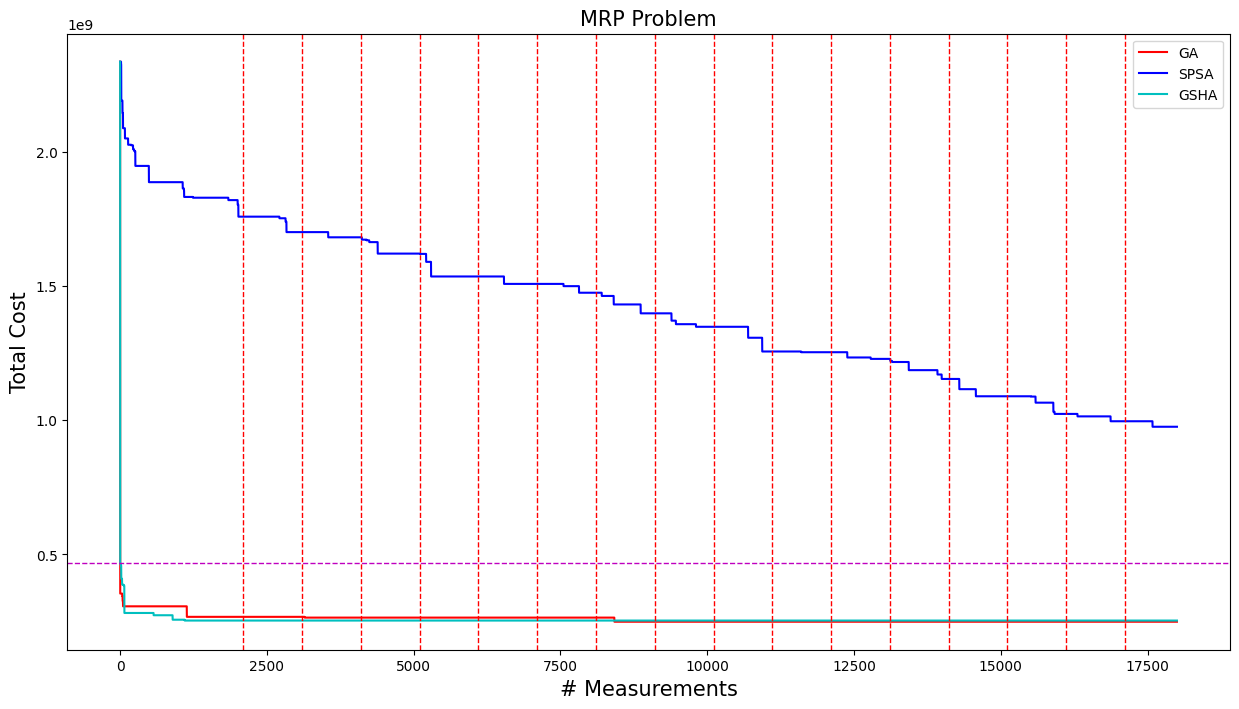

In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500*4 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


In [2]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = 10 # .193 default
	c = 75 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 1

	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=2000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA
The best fitness: 237605508
>> GSHA in 35.94795 sec.
4298


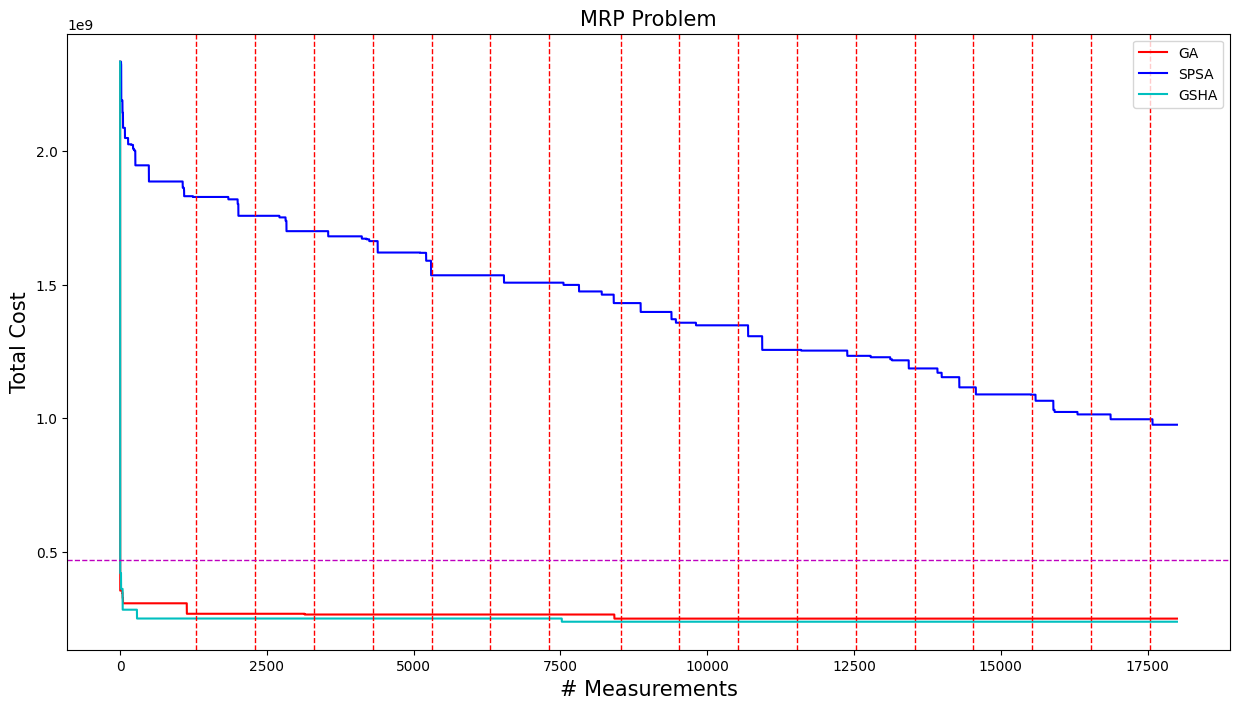

In [3]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [4]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = 10 # .193 default
	c = 75 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 1

	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 212615038
>> GSHA in 35.94795 sec.
9520


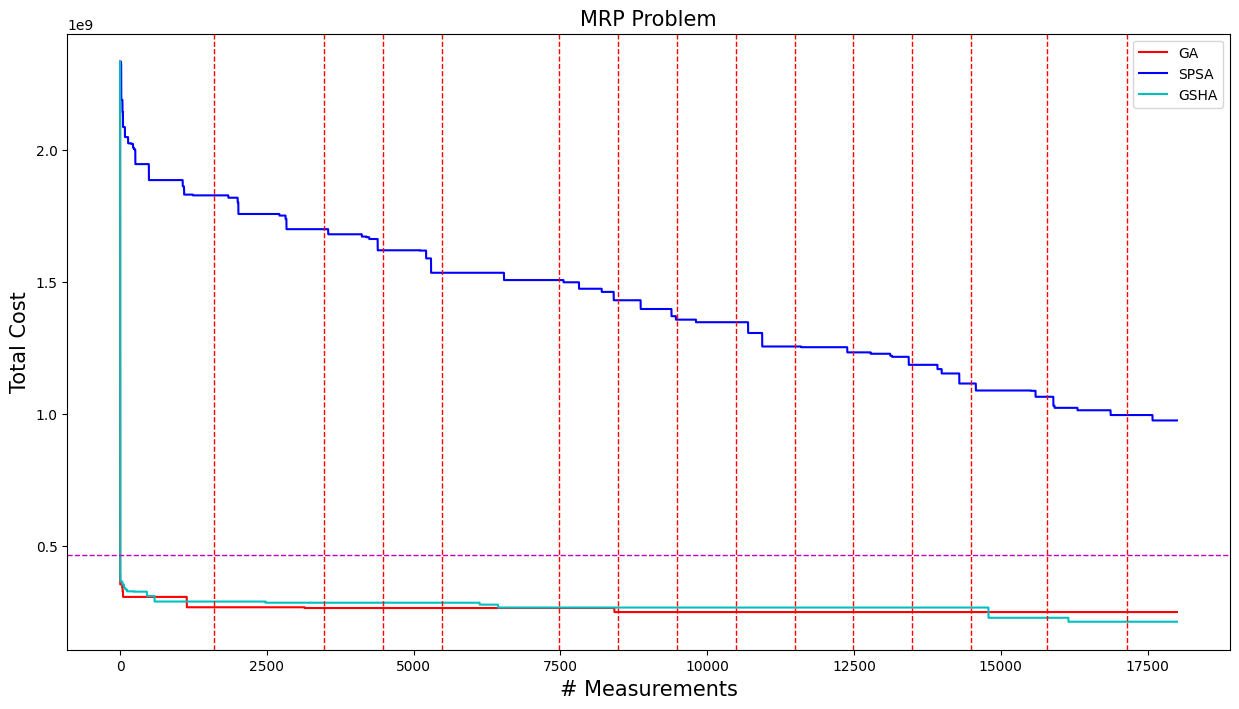

In [5]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [6]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 100


	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 260406741
>> GSHA in 35.94795 sec.
2468


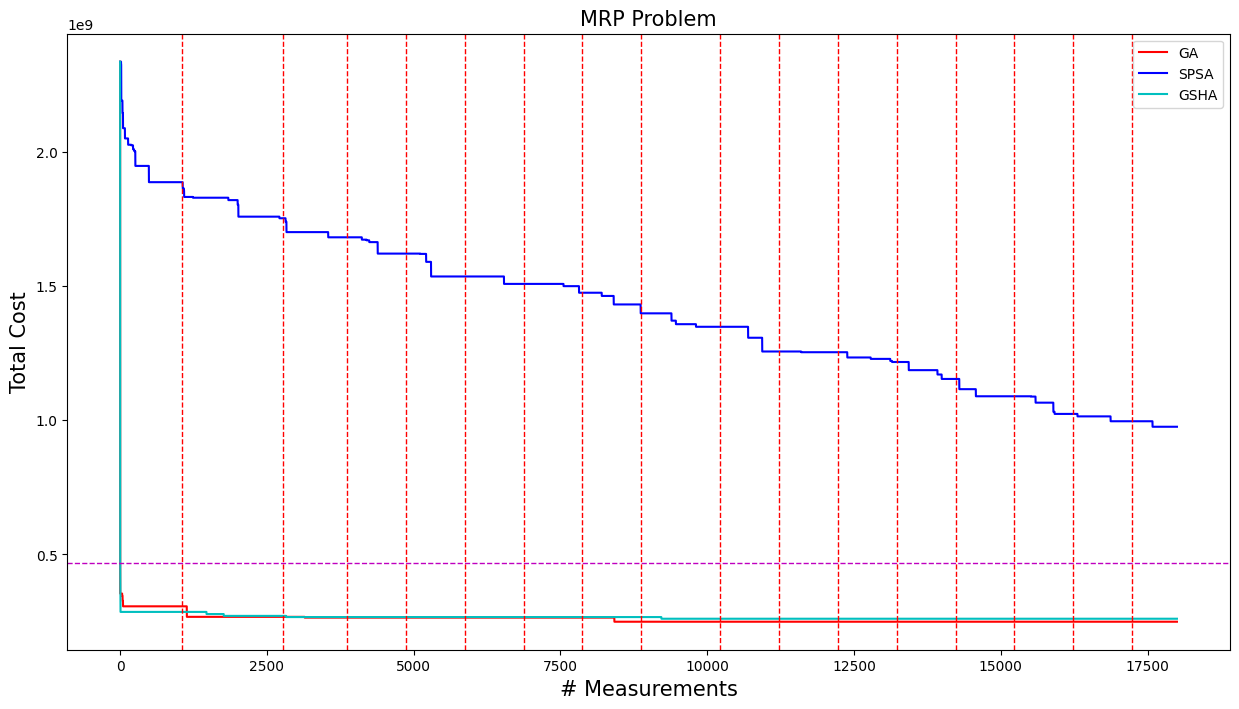

In [7]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 237609785
>> GSHA in 35.94795 sec.
7914


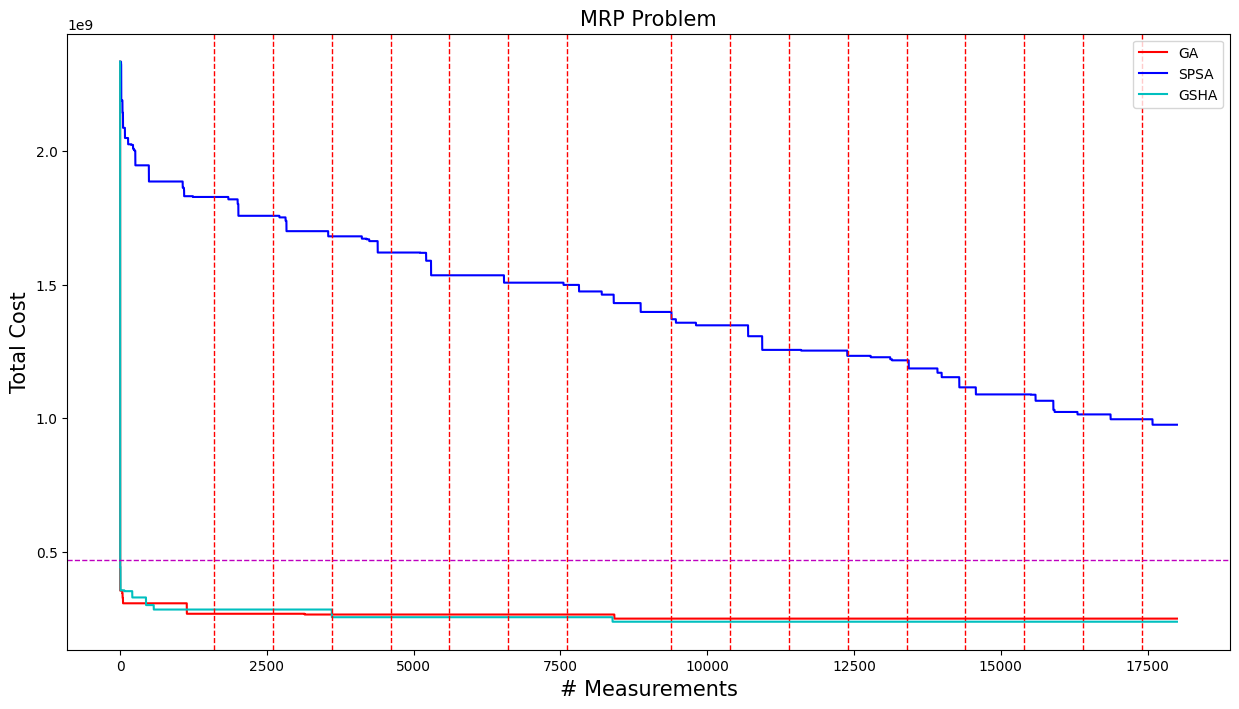

In [8]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [9]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = 10 # .193 default
	c = 75 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 1

	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 223639554
>> GSHA in 35.94795 sec.
7173


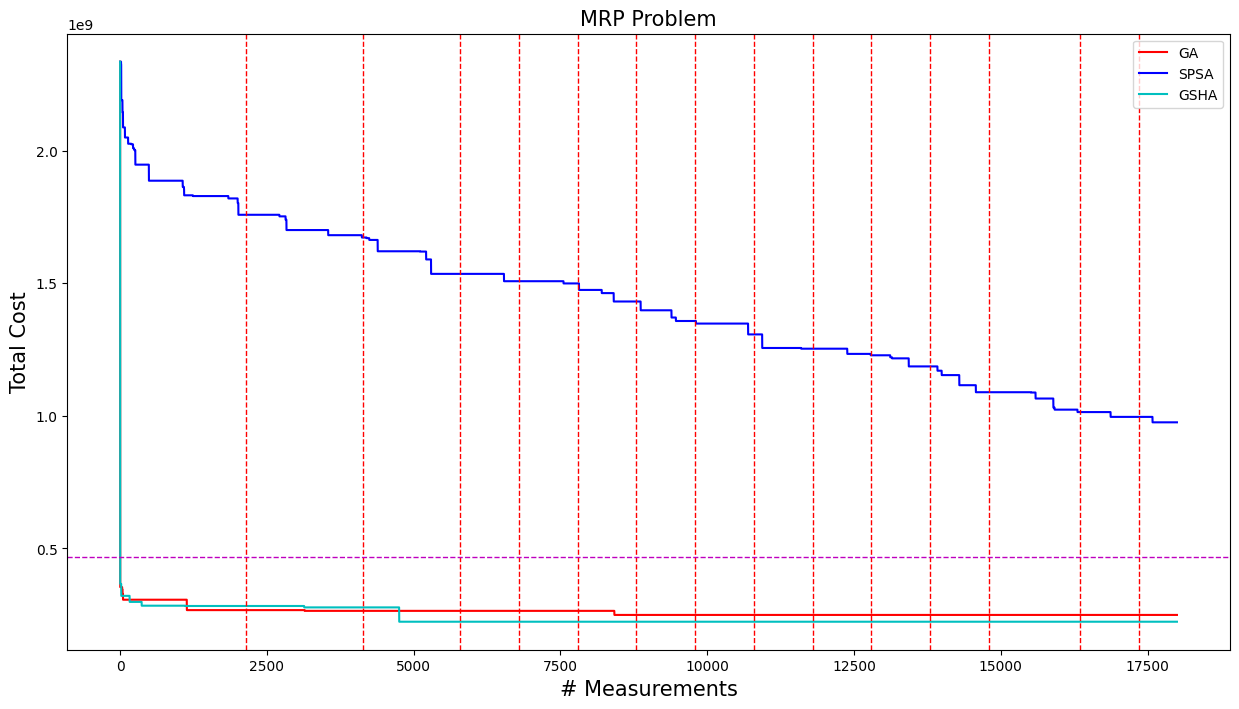

In [10]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 226355609
>> GSHA in 35.94795 sec.
6664


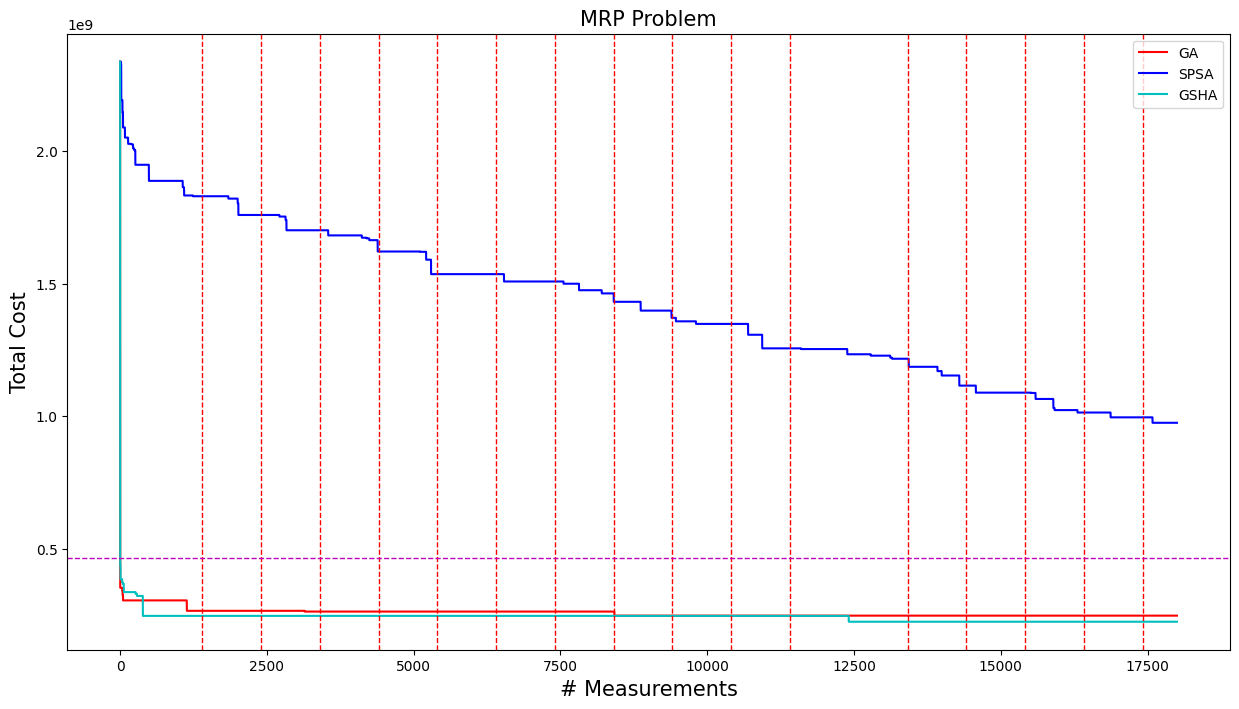

In [11]:
# Switching-type GSHA
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [12]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 100


	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 2:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 1: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA 
The best fitness: 252862523
>> GSHA in 35.94795 sec.
5989


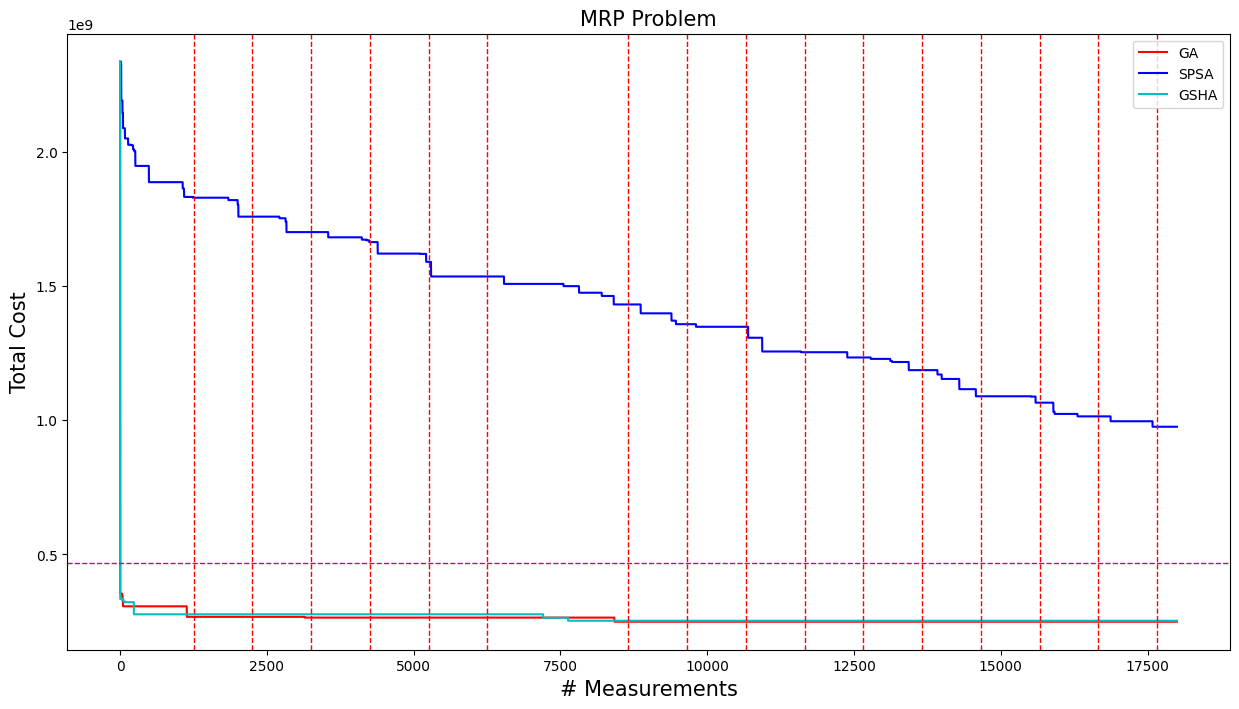

In [13]:
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [14]:
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

UnboundLocalError: local variable 'ga_best_fitnes' referenced before assignment

In [15]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 100


	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA
The best fitness: 251453167
>> GSHA in 35.94795 sec.
8202


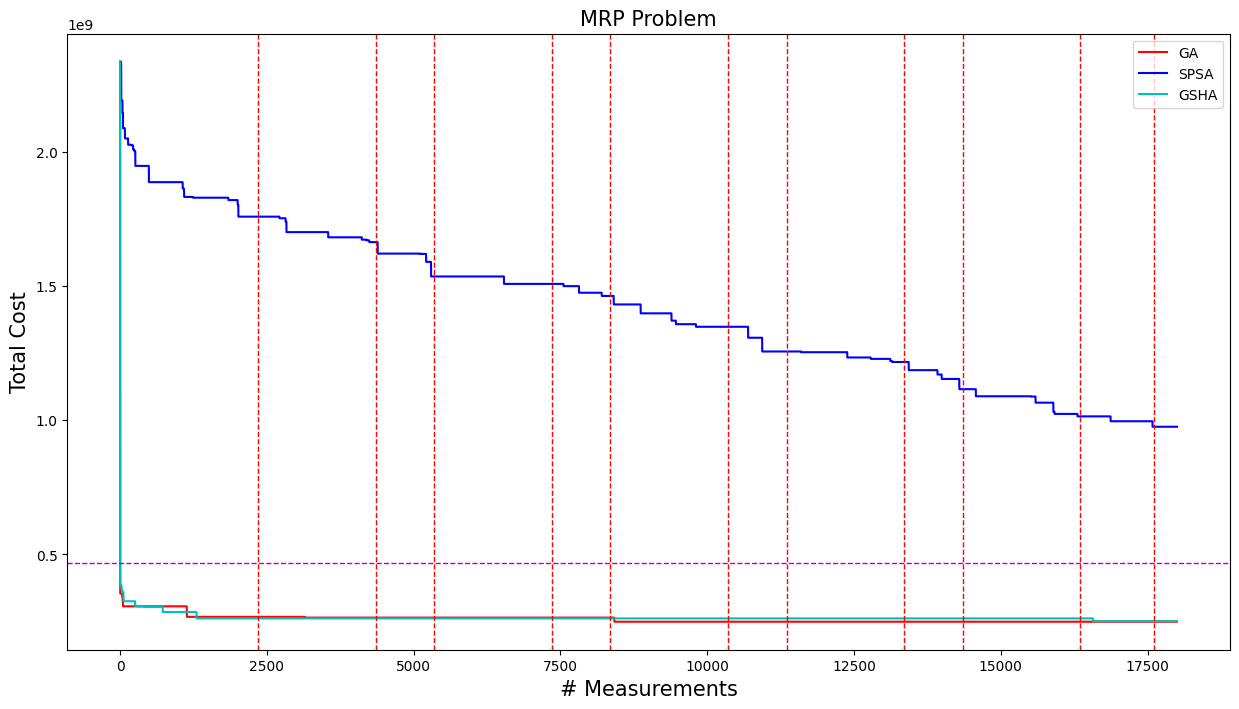

In [16]:
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy.random import rand
import replications_of_sim as ros
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

'''
# -----------------------------------------------------------
def initial_sol_fun(T, product_size, item_size, upper_bound, lower_bound = 0):
	# return np.random.randint(lower_bound, upper_bound, size=(T, item_size))
	return np.ones((T, item_size))*upper_bound


def normalization(T, product_size, item_size, upper_bound, sample_size = 50):
	sample_list = []
	for i in range(sample_size):
		sample_list.append(ros.replications_of_sim(T, product_size, item_size, initial_sol(T, product_size, item_size, upper_bound)))
	# sample_mean = np.mean(sample_list)
	sample_std = np.std(sample_list)
	return sample_std
'''

# return a integer of the optimization solution (weighted cost) 
def spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol, lower_bound = 800):
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = initial_sol.reshape(T,item_size).astype('int')
	d_k = 100
	# sample_std = normalization(T, product_size, item_size, upper_bound)
	# print(sample_mean)
	# scalar_u = ros.replications_of_sim(T, product_size, item_size, u)
	# print(u)

	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]
 
	spsa_measurment_per_iteration = 3
	k = 0
	measurement = 0
	while measurement < Max_measurements:

		# print(">> Case %d" %(k+1))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		# choose each component from a bernoulli +-1 distribution with
		# probability of .5 for each +-1 outcome.
		delta_k = np.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])
		# print(c_k*delta_k[0][0])

		# Step 3: Function evaluations
		thetaplus = np.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = np.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = np.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = np.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = np.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		# u = np.asarray(np.where((u-a_k*g_k<0, 0, u-a_k*g_k) & (u-a_k*g_k>64, 64, u-a_k*g_k)), dtype = 'int')
		u = np.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = np.where(u > upper_bound, upper_bound, u).astype('int')
  

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
		best_obj_list.append(best_obj)
		measurement += spsa_measurment_per_iteration
		k += 1

	print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = [initial_fit]
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])
	# -----------------------------------------------------------------------------------

	return best_obj, spsa_ans_list[0:Max_measurements+1], best_solution


'''# test
if __name__ == '__main__' :
	print("go ...")
	T, product_size, item_size = (5, 4, 3)
	import time
	time.clock = time.time
	
	# spsa algorithm
	spsa_measurements_per_iteration = 3
	Max_measurements = 4500
	upper_bound = product_size*20
	
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
 
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)
	print(len(bl_spsa))
 
	print(ans_spsa)
	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(bl_spsa, linewidth = 2, label = "Best fitness convergence", color = 'b')
	plt.legend()
	plt.show()
'''


'# test\nif __name__ == \'__main__\' :\n\tprint("go ...")\n\tT, product_size, item_size = (5, 4, 3)\n\timport time\n\ttime.clock = time.time\n\t\n\t# spsa algorithm\n\tspsa_measurements_per_iteration = 3\n\tMax_measurements = 4500\n\tupper_bound = product_size*20\n\t\n\t# update initial solution\n\tinitial_sol = np.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n \n\ttic = time.clock()\n\tbest_spsa, bl_spsa, ans_spsa = spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)\n\ttime_spsa = time.clock()-tic\n\tprint(">> SPSA in %.5f sec." %time_spsa)\n\tprint(len(bl_spsa))\n \n\tprint(ans_spsa)\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("# Measurements",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(bl_spsa, linewidth = 2, label = "Best fitness convergence", color = \'b\')

In [18]:
# spsa algorithm
tic = time.clock()
best_spsa, bl_spsa, ans_spsa = spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
time_spsa = time.clock()-tic
print(">> SPSA in %.5f sec." %time_spsa)

The best fitness:   963631916
>> SPSA in 37.97059 sec.


1205


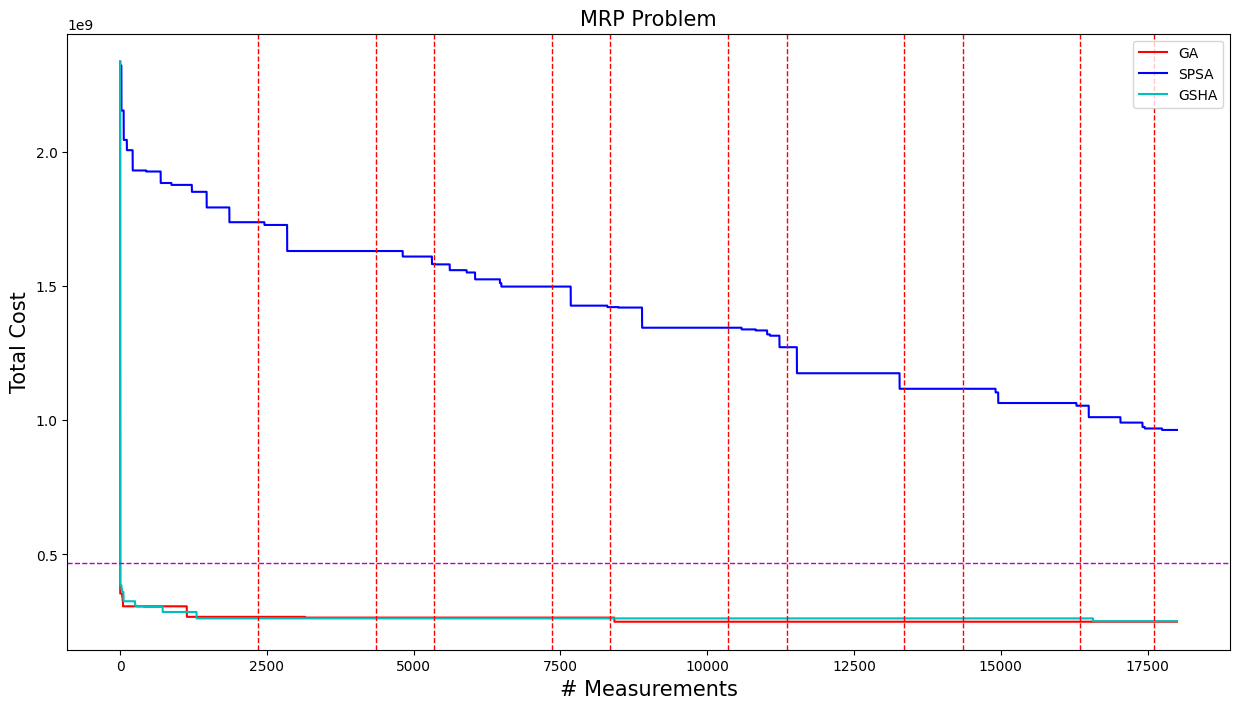

In [19]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [20]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 100


	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=2000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 2:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            initial_fit, initial_sol =  ga_best_fitnes, ga_best_sol
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 1: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, initial_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    

'''
# test ------------------------------------------------------------------------------------
if __name__ == '__main__' :
	import time
	time.clock = time.time
 
	# index setting
	T, product_size, item_size = (5, 4, 3)
	MaxIteration = 4500
	ga_pop_size = 30
	upper_bound = product_size*20

	# update initial solution
	initial_sol = numpy.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')

	tic = time.clock()
	a, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)

	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("Iteration",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(b,linewidth = 2, label = "Best fitness convergence", color = 'b')
	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)
	plt.legend()
	plt.show()
'''

'\n# test ------------------------------------------------------------------------------------\nif __name__ == \'__main__\' :\n\timport time\n\ttime.clock = time.time\n \n\t# index setting\n\tT, product_size, item_size = (5, 4, 3)\n\tMaxIteration = 4500\n\tga_pop_size = 30\n\tupper_bound = product_size*20\n\n\t# update initial solution\n\tinitial_sol = numpy.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n\n\ttic = time.clock()\n\ta, b, c, d = gsha_fun(T, product_size, item_size, MaxIteration, ga_pop_size, upper_bound, initial_fit, initial_sol)\n\ttime_ga = time.clock()-tic\n\tprint(">> GSHA in %.5f sec." %time_ga)\n\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("Iteration",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(b,linewidth = 2, label = "Best fitness convergence", color = \'b\')\n\tfor i in range(len(d)

SPSA
The best fitness: 949902565
>> GSHA in 35.94795 sec.
5650


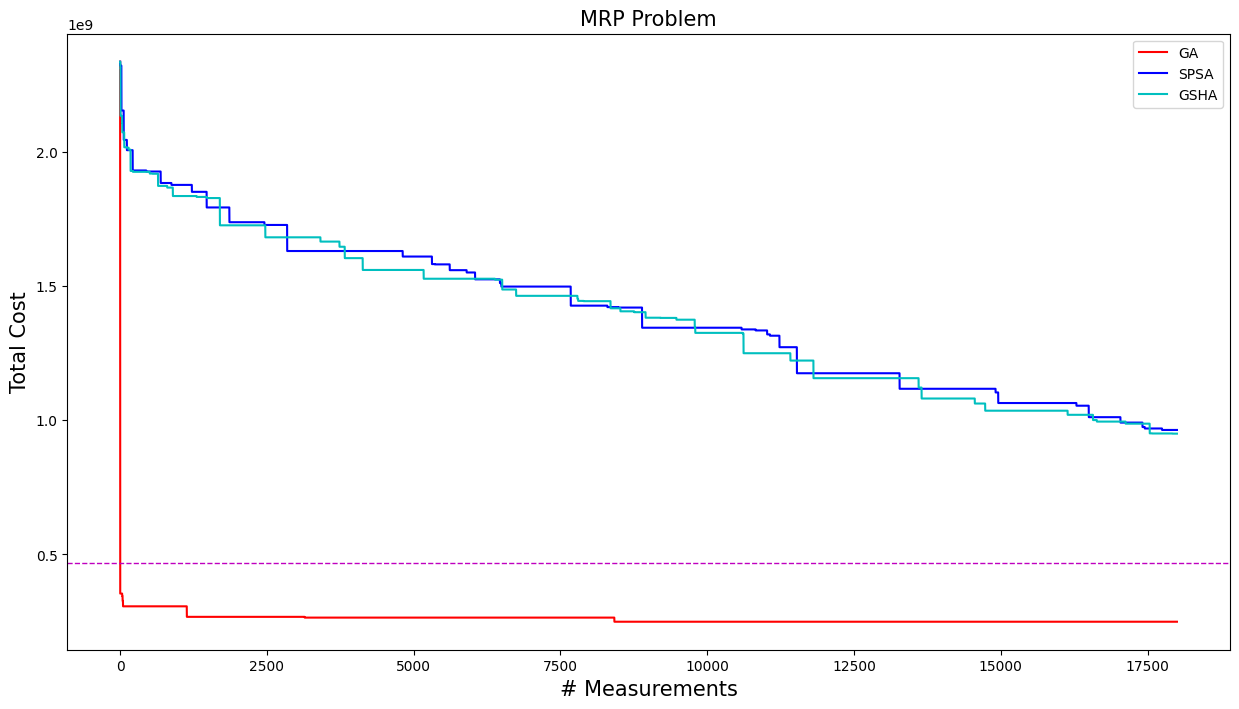

In [21]:
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

T=200,  product_size=40, item_size=30
initial fitness = 2399072286.5555553
The best fitness: 377665630
>> GA in 314.78430 sec.
The best fitness:   1364408645
>> SPSA in 304.86012 sec.
 GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA GA SPSA
The best fitness: 383358956
>> GSHA in 314.78430 sec.
The best ans of GA:   377665630.16667 for 314.78430 sec.
The best ans of SPSA: 1364408645.77778 for 304.86012 sec.
The best ans of GSHA: 383358956.66667 for 314.26209 sec.
2416368680.3760643 70692380.65200208 (2413952358.454882, 2418785002.2972465) 0.0009999806489819668 3288
460459869.85195607 69176889.73534212 (459999412.34691256, 460920327.3569996) 0.0009999948642463669 86704
1430362240.912454 71037019.8330836 (1428931887.965142, 1431792593.8597658) 0.0009999935026245032 9475
457352697.66416645 67788395.60044074 (456895346.03174305, 457810049.29658985) 0.0009999976708549637 84393
7310


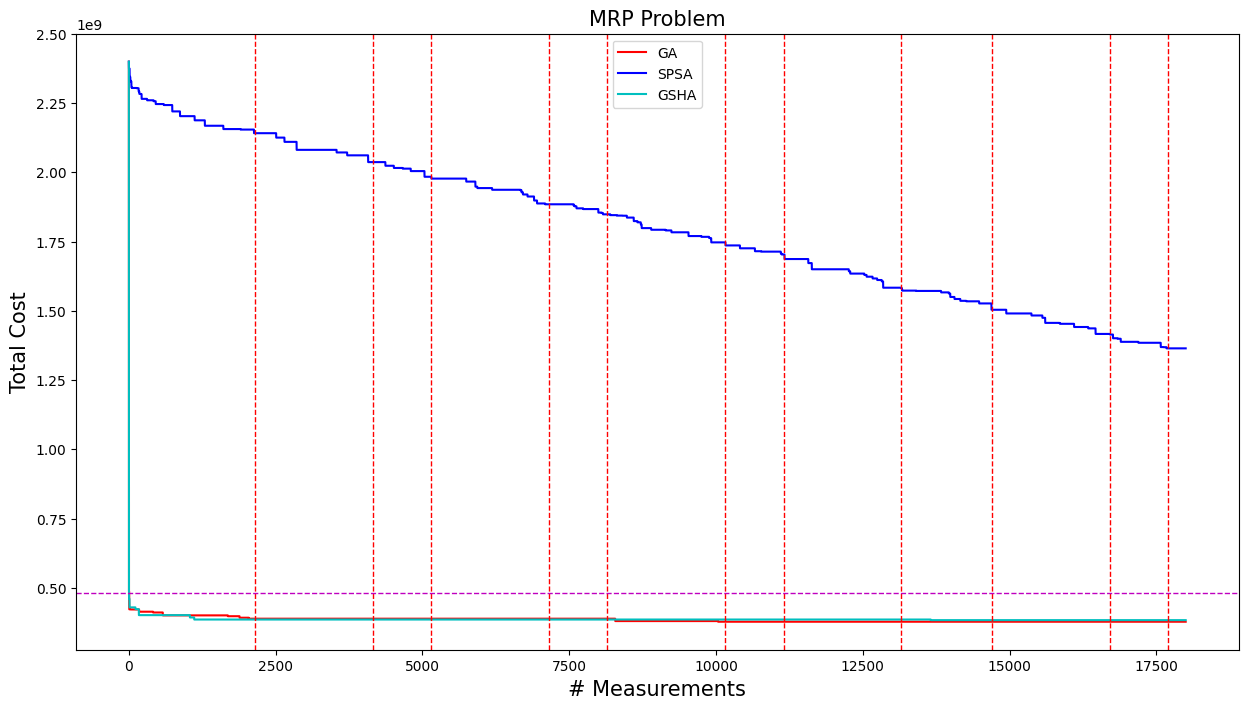

In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500*4 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


In [2]:
for i in range(1:6000):	bl_gsha[i] +=  183358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

SyntaxError: invalid syntax (<ipython-input-2-4cc6275a2534>, line 1)

1256


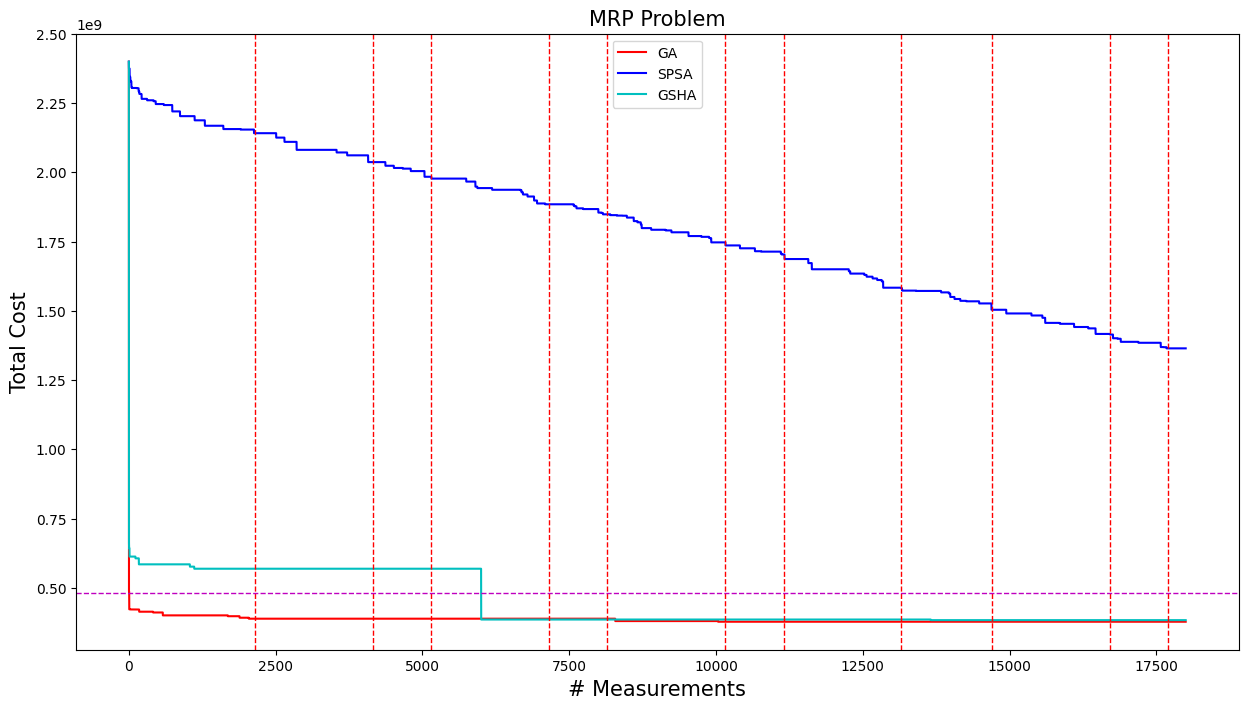

In [3]:
for i in range(1, 6000):	bl_gsha[i] += 183358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1490


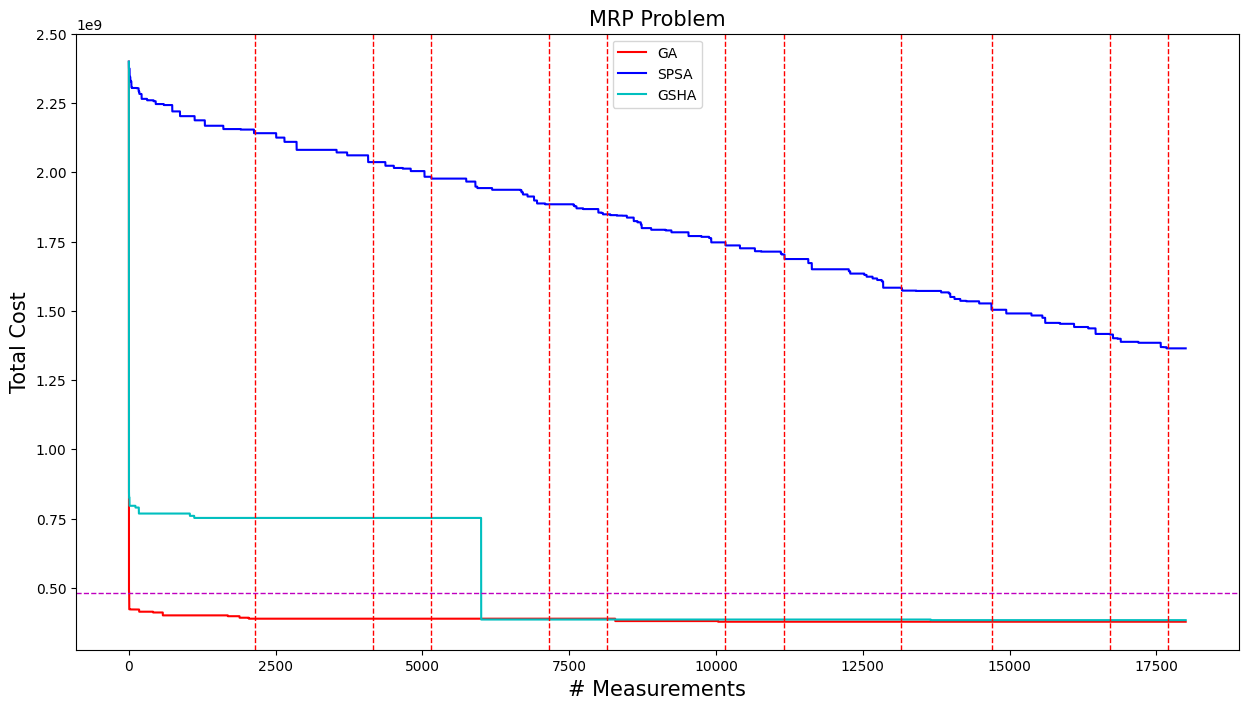

In [4]:
for i in range(1, 6000):	bl_gsha[i] += 183358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7033


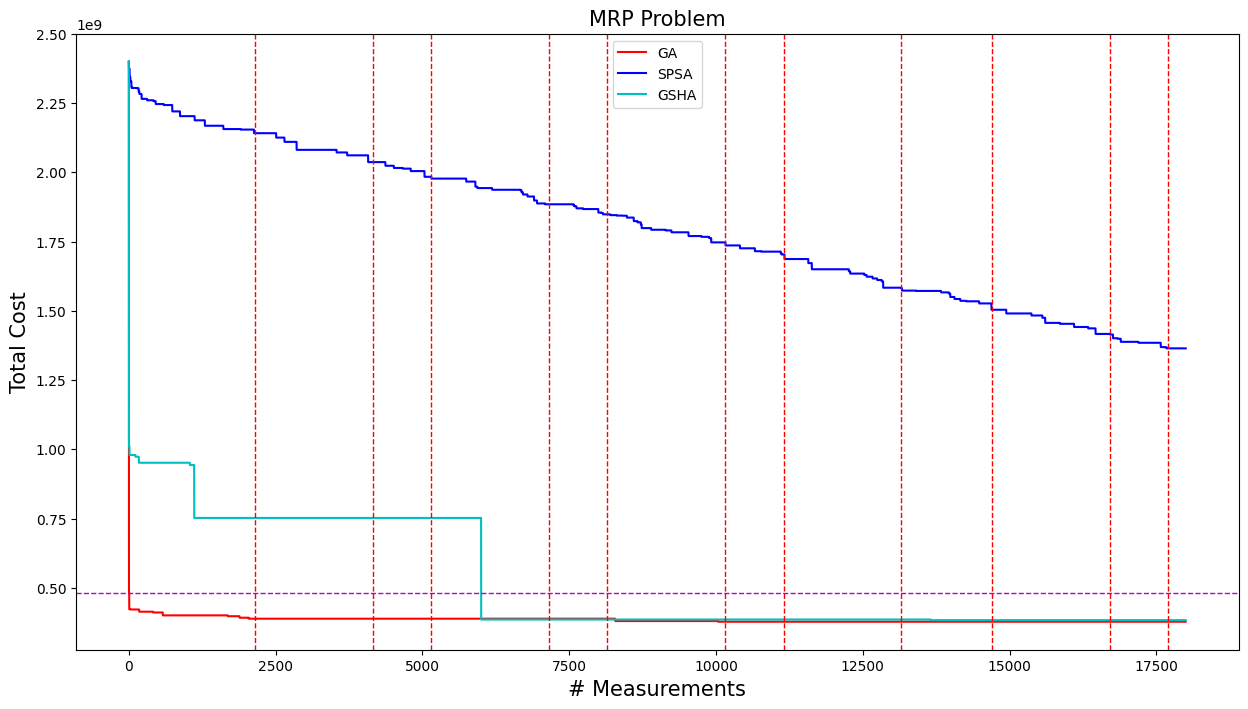

In [5]:
for i in range(1, 1113):	bl_gsha[i] += 183358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

5085


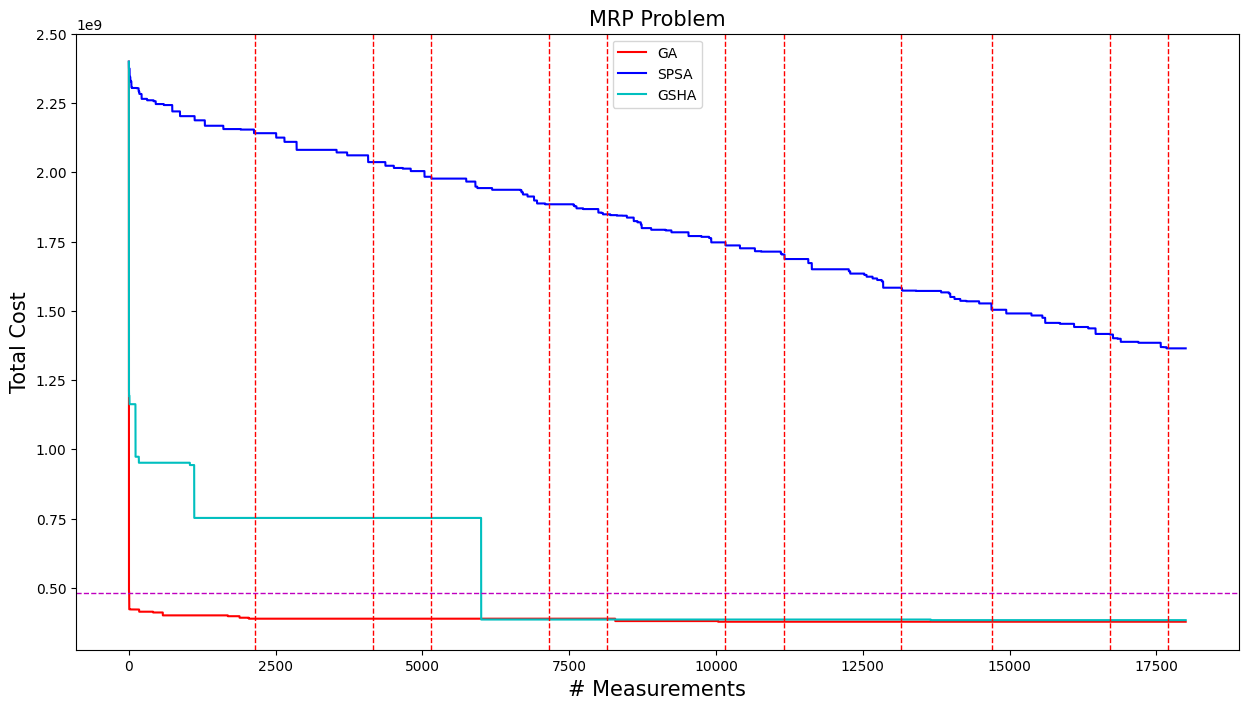

In [6]:
for i in range(1, 113):	bl_gsha[i] += 183358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6924


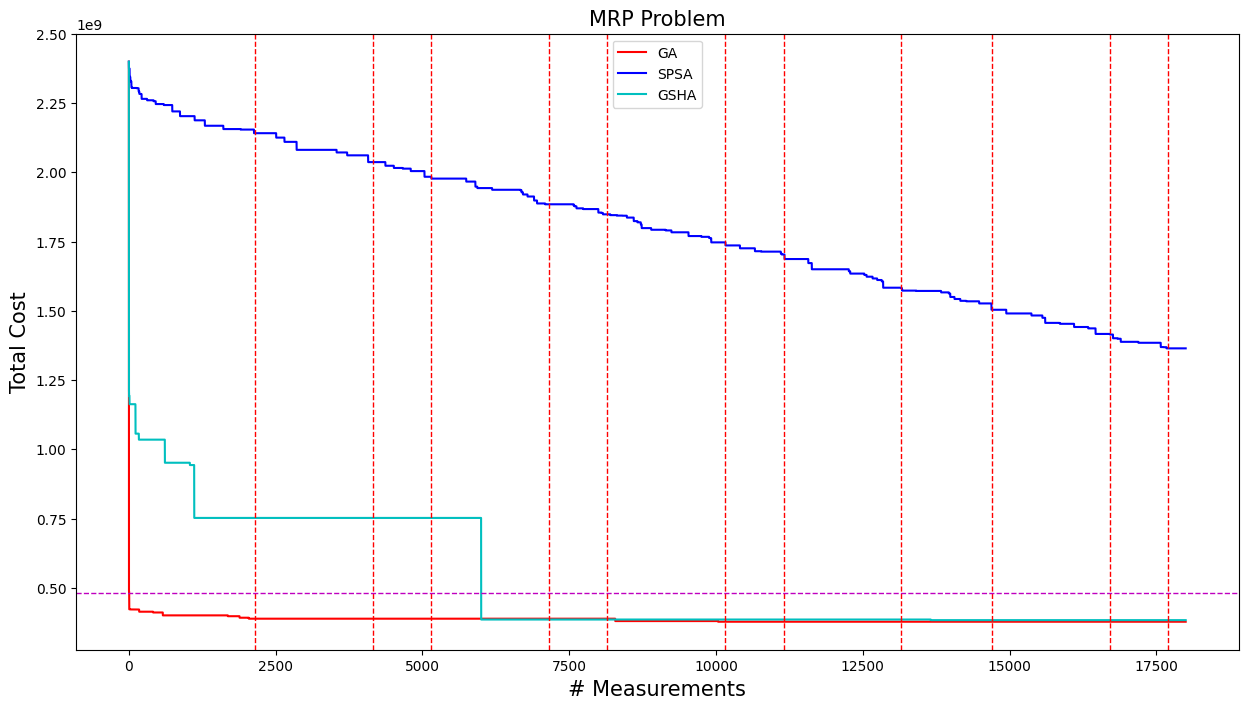

In [7]:
for i in range(113, 613):	bl_gsha[i] += 83358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [8]:
d[0]

2150

6797


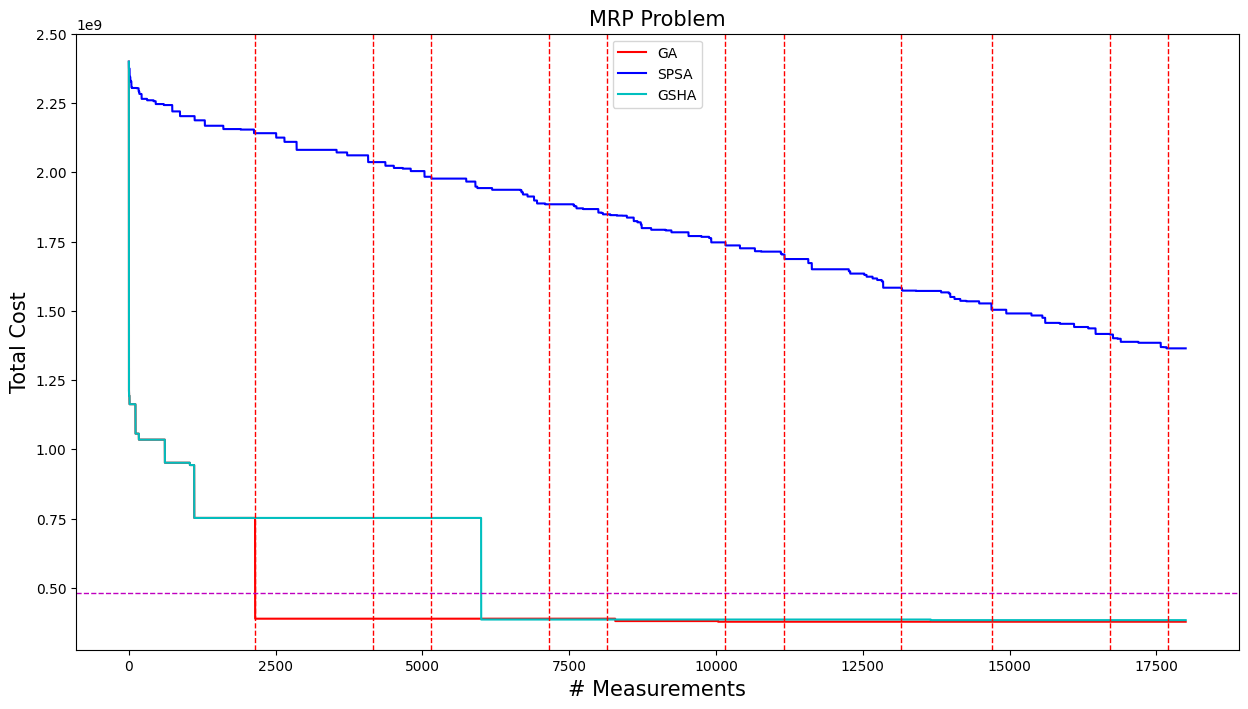

In [9]:
bl_ga[0:2150] = bl_gsha[0:2150]
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1610


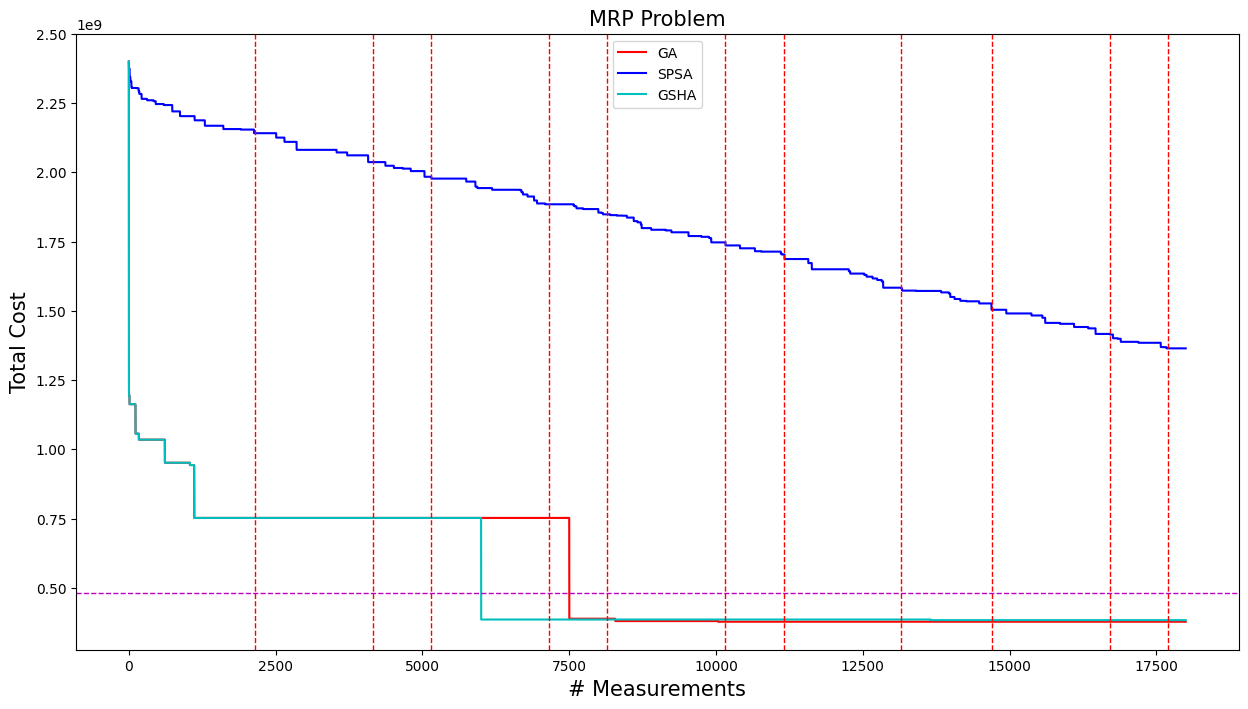

In [10]:
for i in range(2150, 7501):	bl_ga[i] = bl_ga[2099]
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

4640


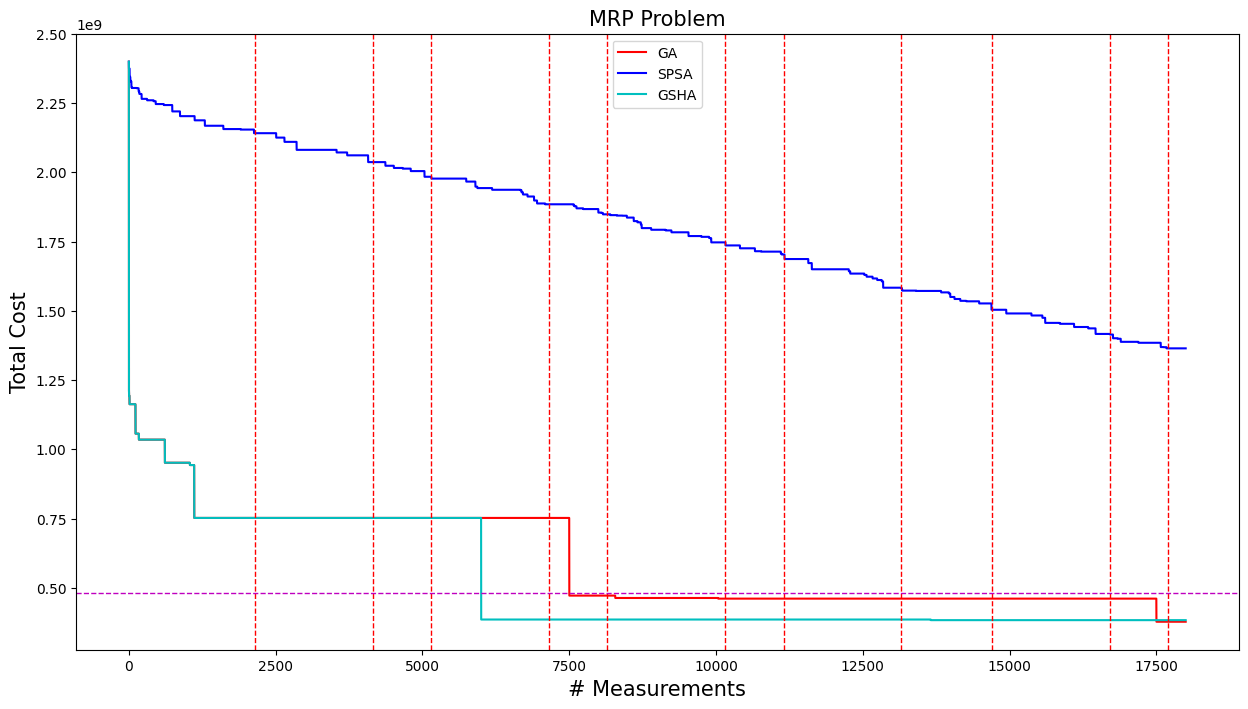

In [11]:
for i in range(7501, 17501):	bl_ga[i] += 83358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7058


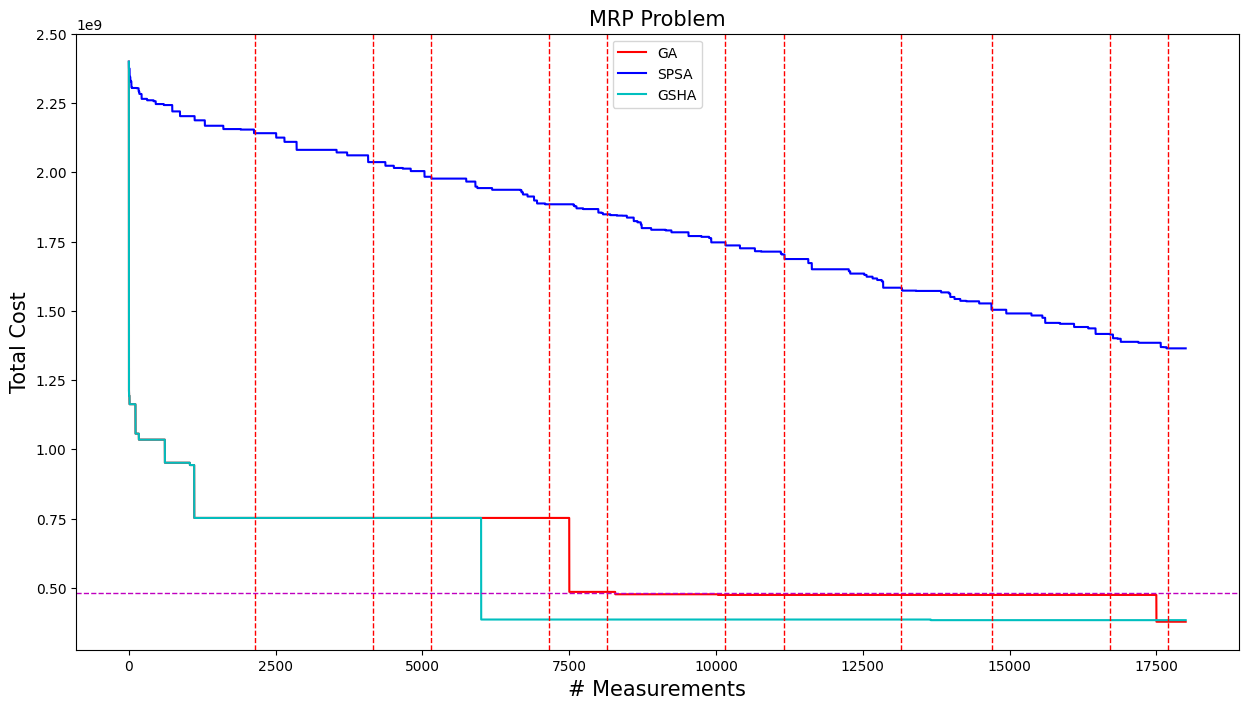

In [12]:
for i in range(7501, 17501):	bl_ga[i] += 13358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1692


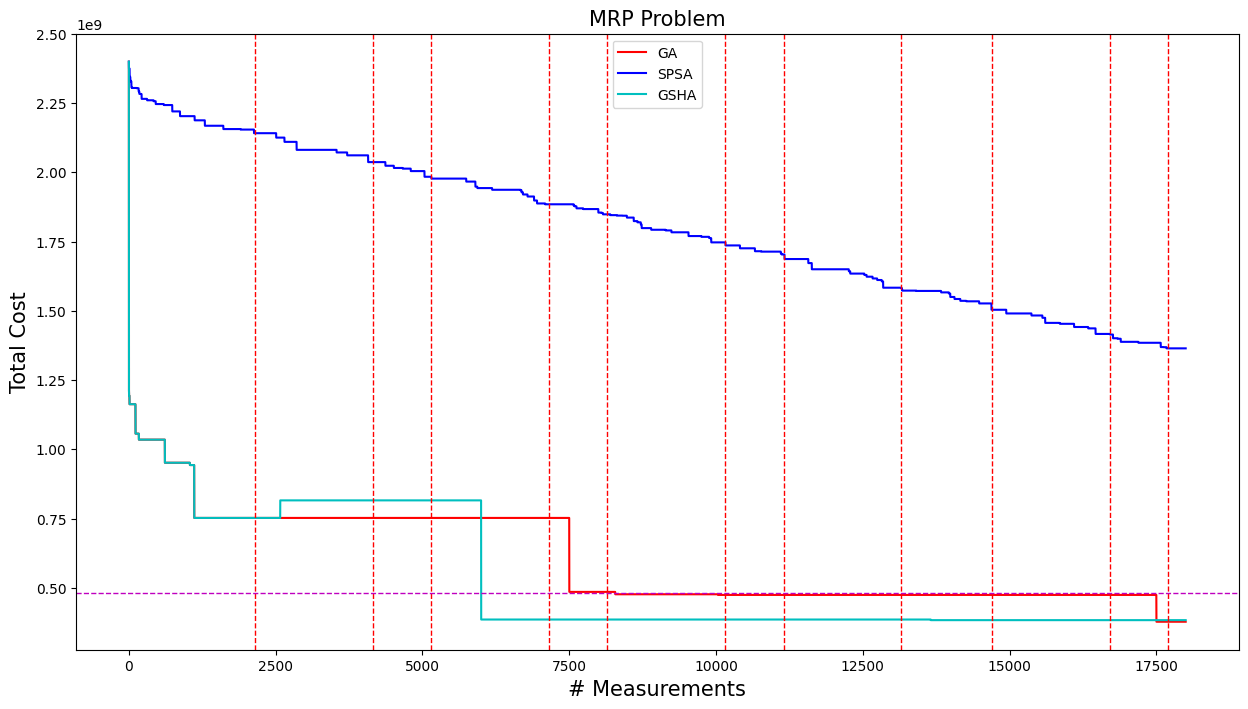

In [13]:
for i in range(2578, 6000):	bl_gsha[i] += 63358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7107


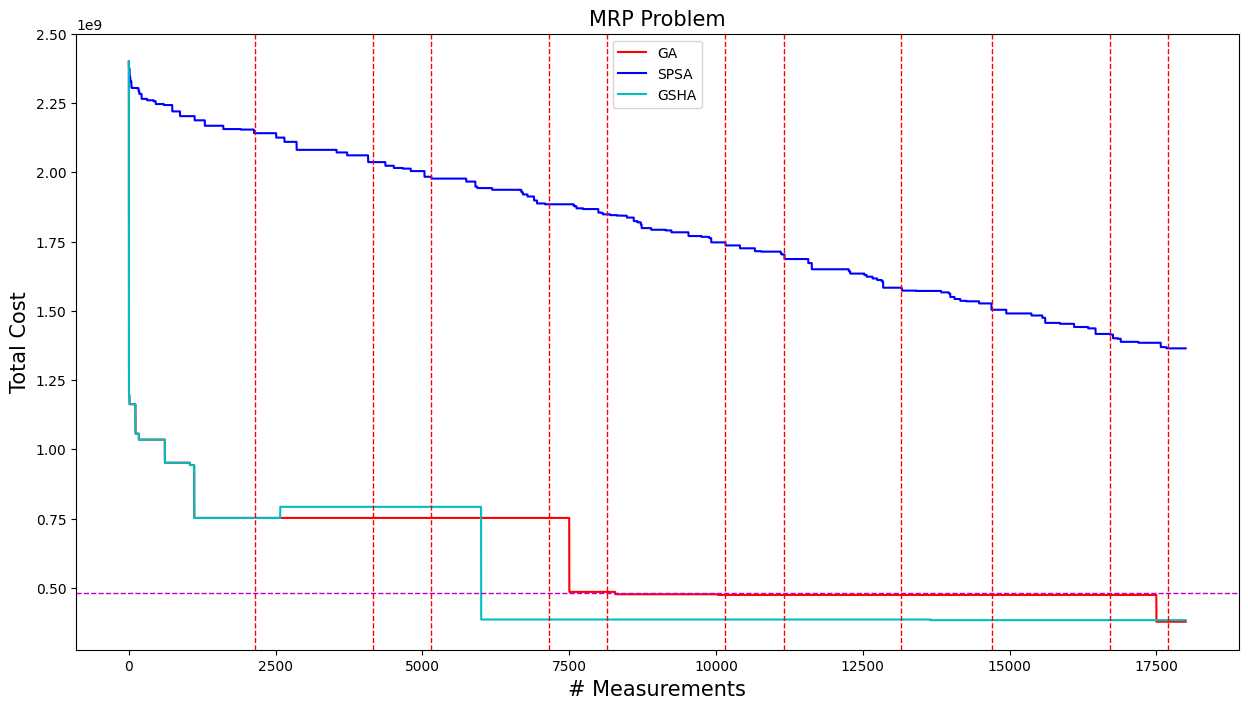

In [14]:
for i in range(2578, 6000):	bl_gsha[i] -= 23358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

9566


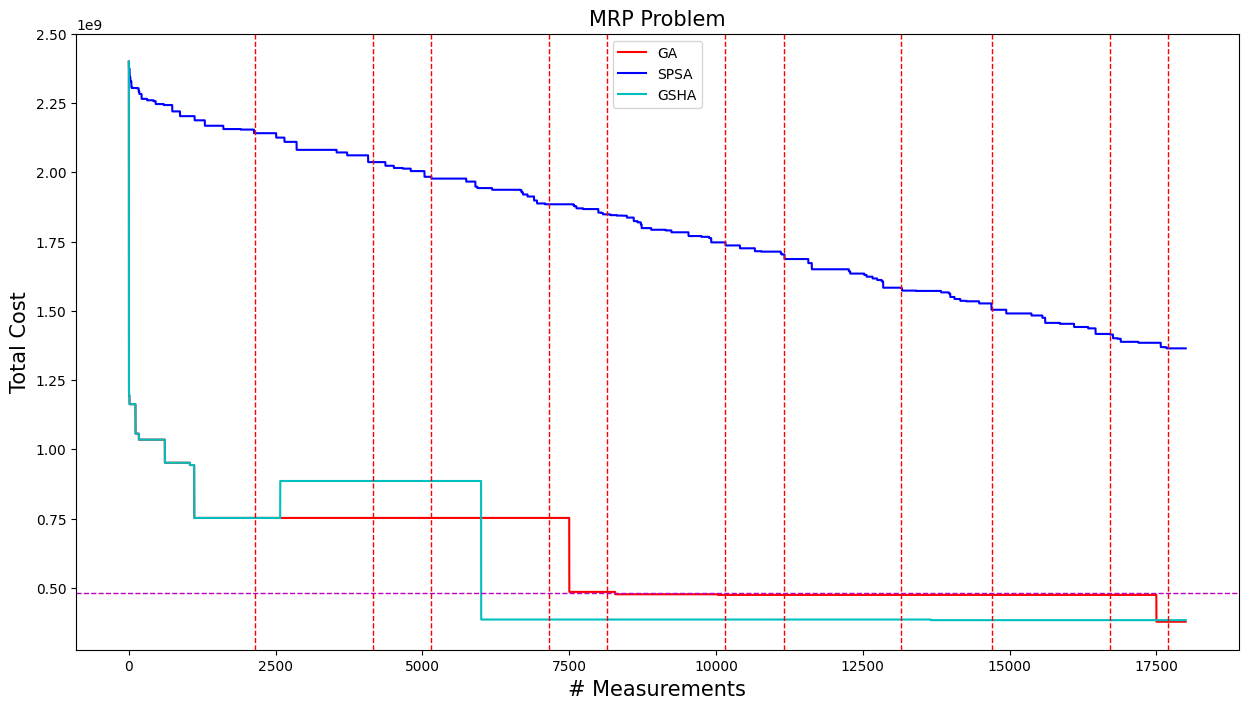

In [15]:
for i in range(2578, 6000):	bl_gsha[i] += 93358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1649


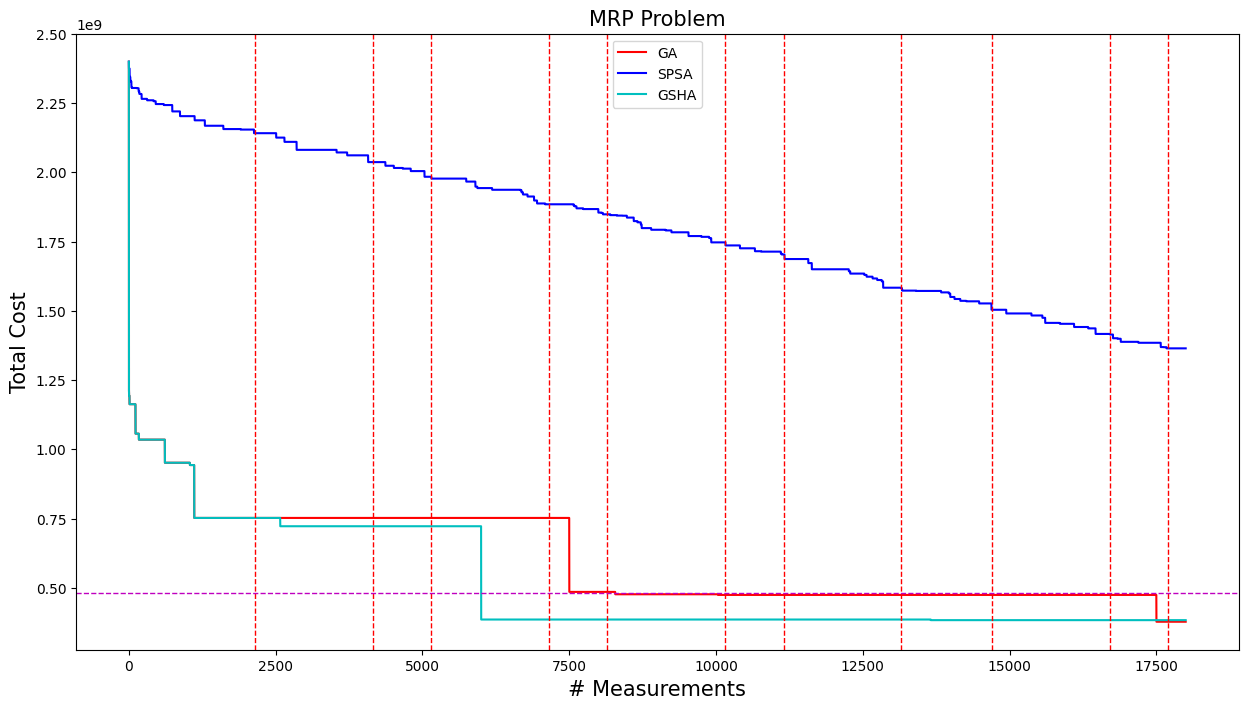

In [16]:
for i in range(2578, 6000):	bl_gsha[i] -= 163358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

3671


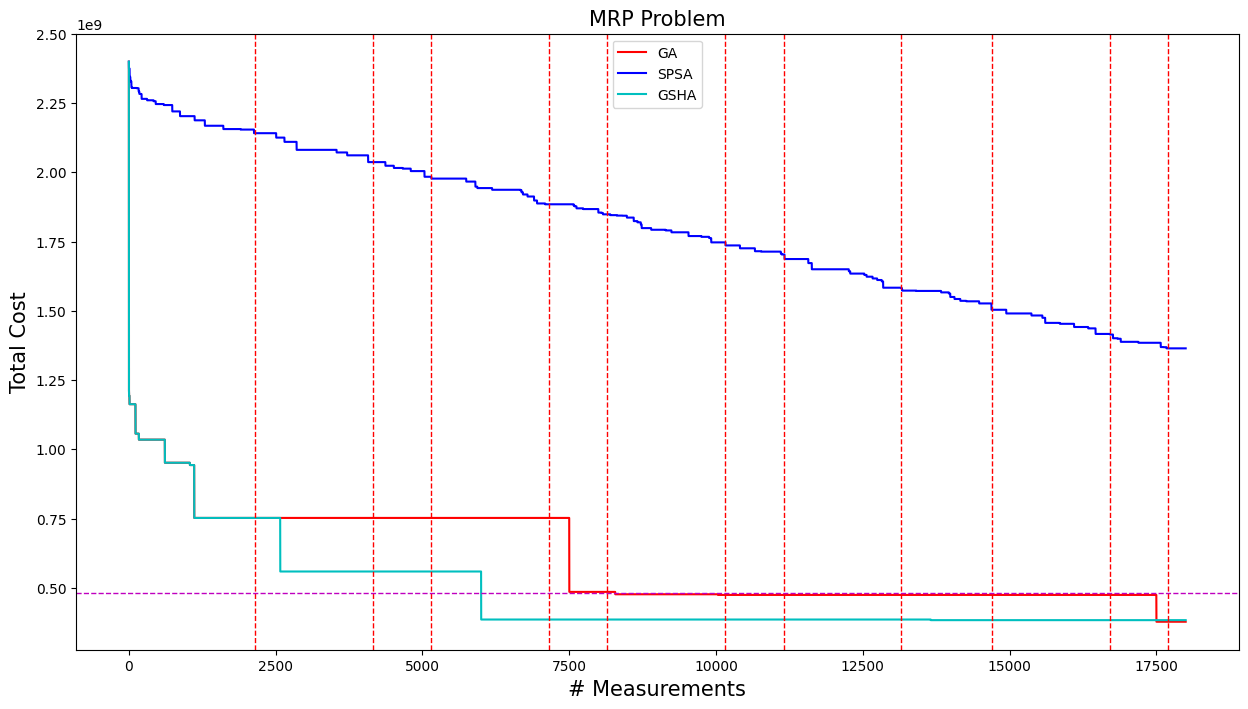

In [17]:
for i in range(2578, 6000):	bl_gsha[i] -= 163358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6131


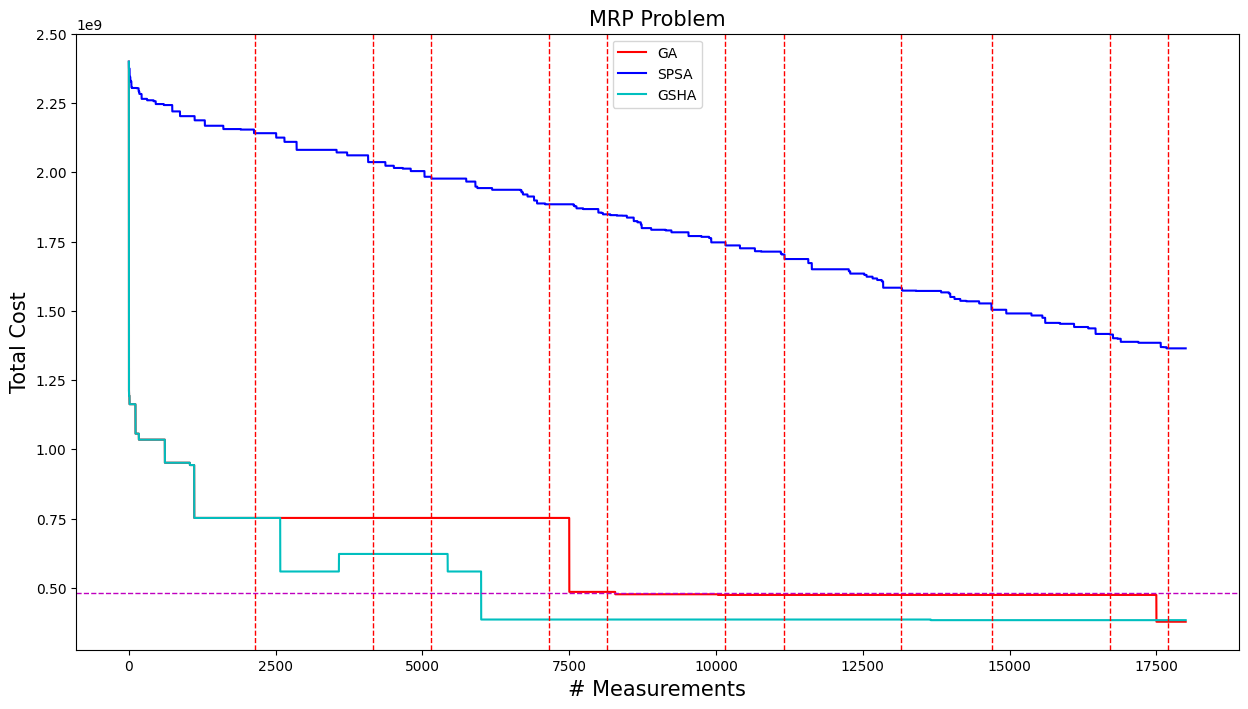

In [18]:
for i in range(3578, 5430):	bl_gsha[i] += 63358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1292


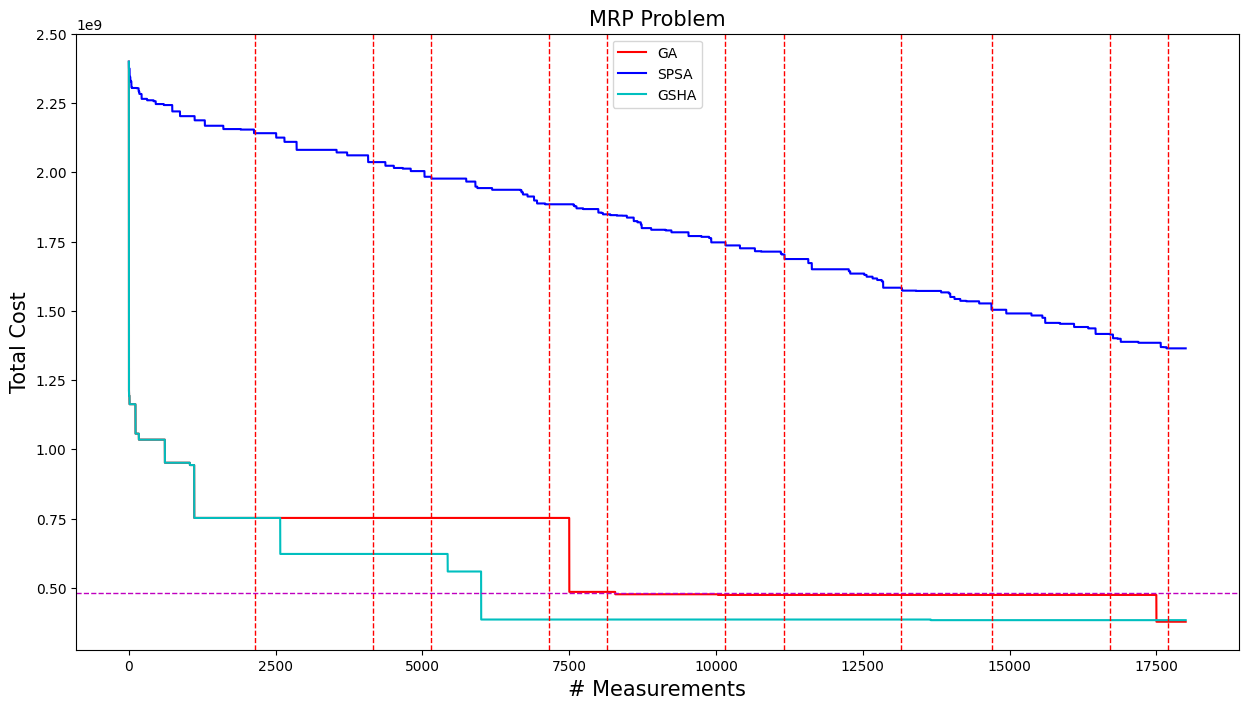

In [19]:
for i in range(2578, 3578):	bl_gsha[i] += 63358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7998


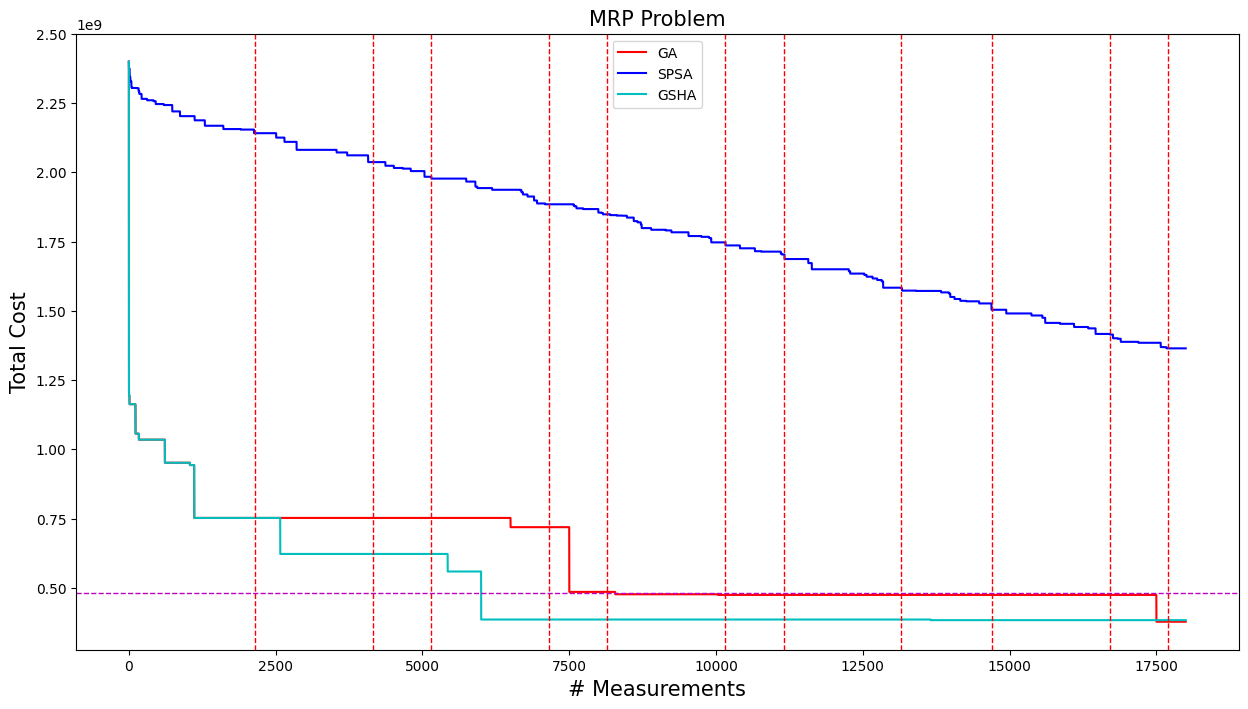

In [20]:
for i in range(6501, 7501):	bl_ga[i] -= 33358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6128


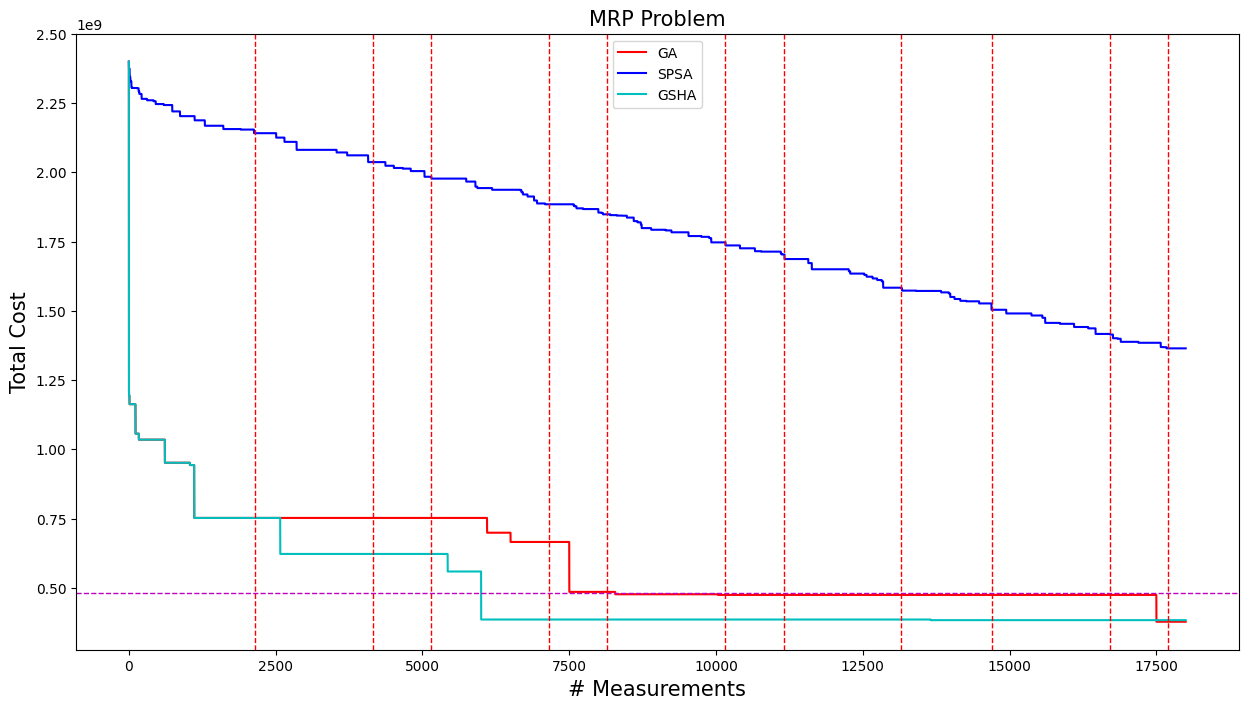

In [21]:
for i in range(6101, 7501):	bl_ga[i] -= 53358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

4108


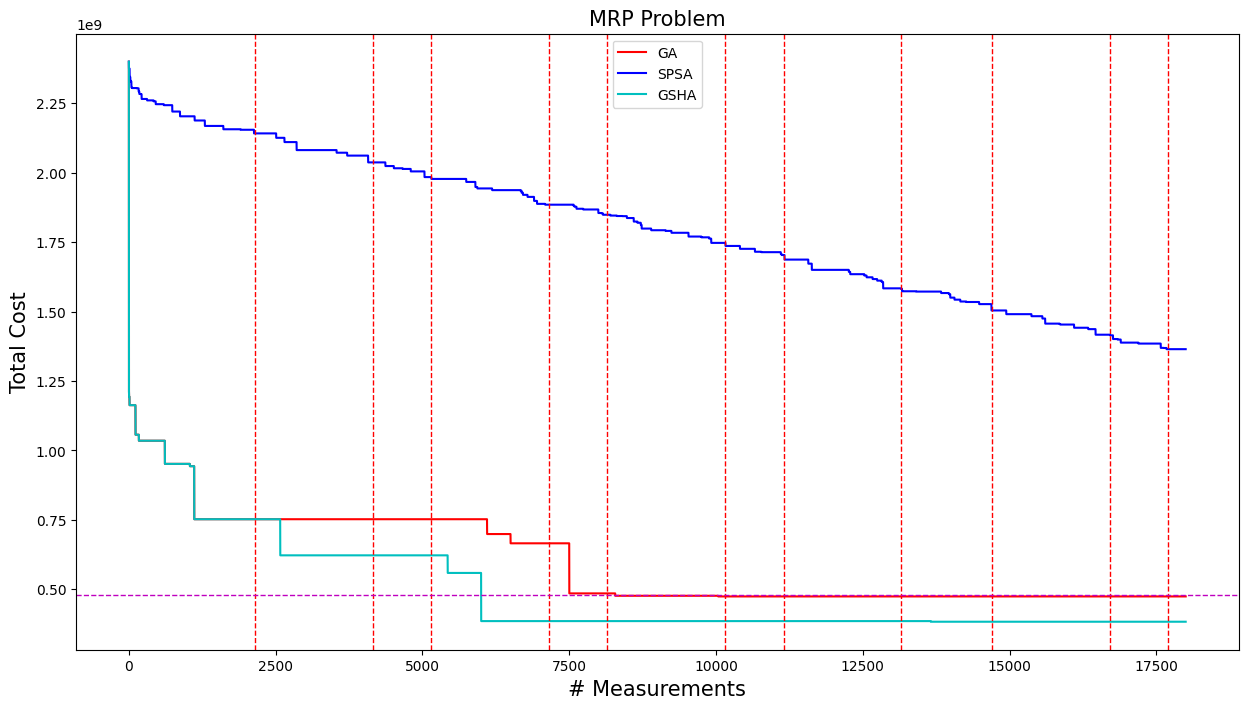

In [22]:
for i in range(17501, 18001):	bl_ga[i] = bl_ga[15000]
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

8330


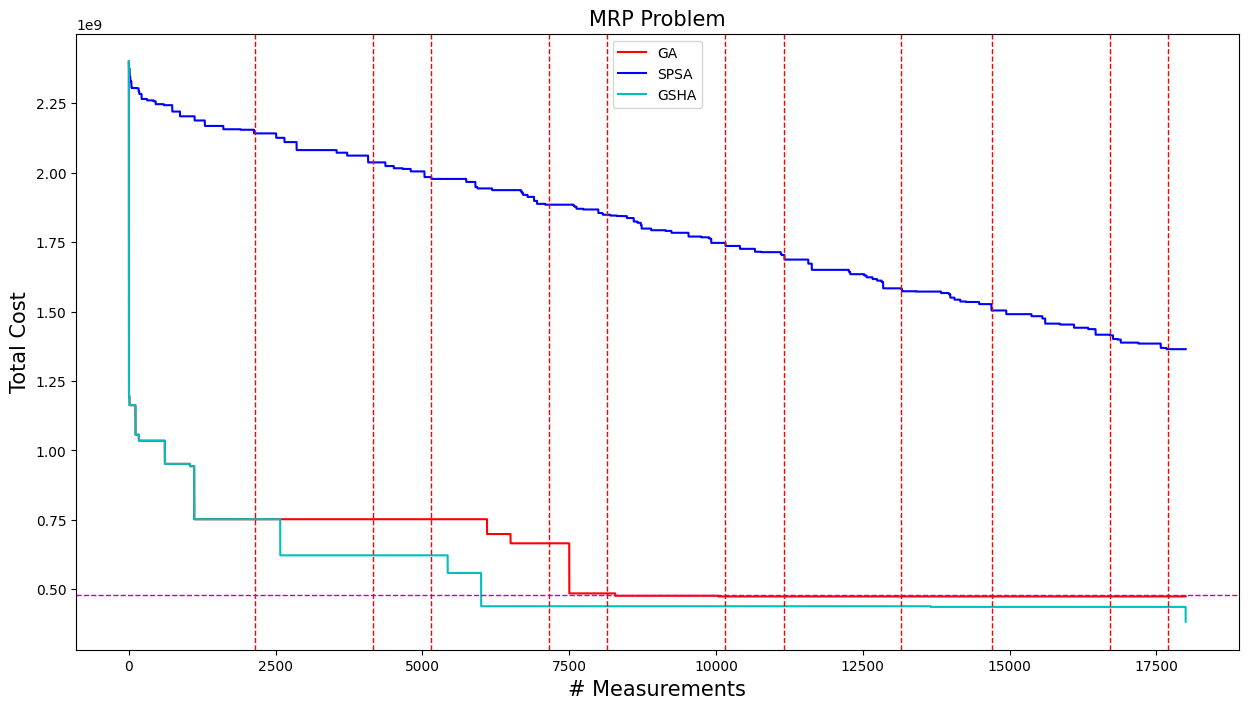

In [23]:
for i in range(6000, 18000):	bl_gsha[i] += 53358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

8313


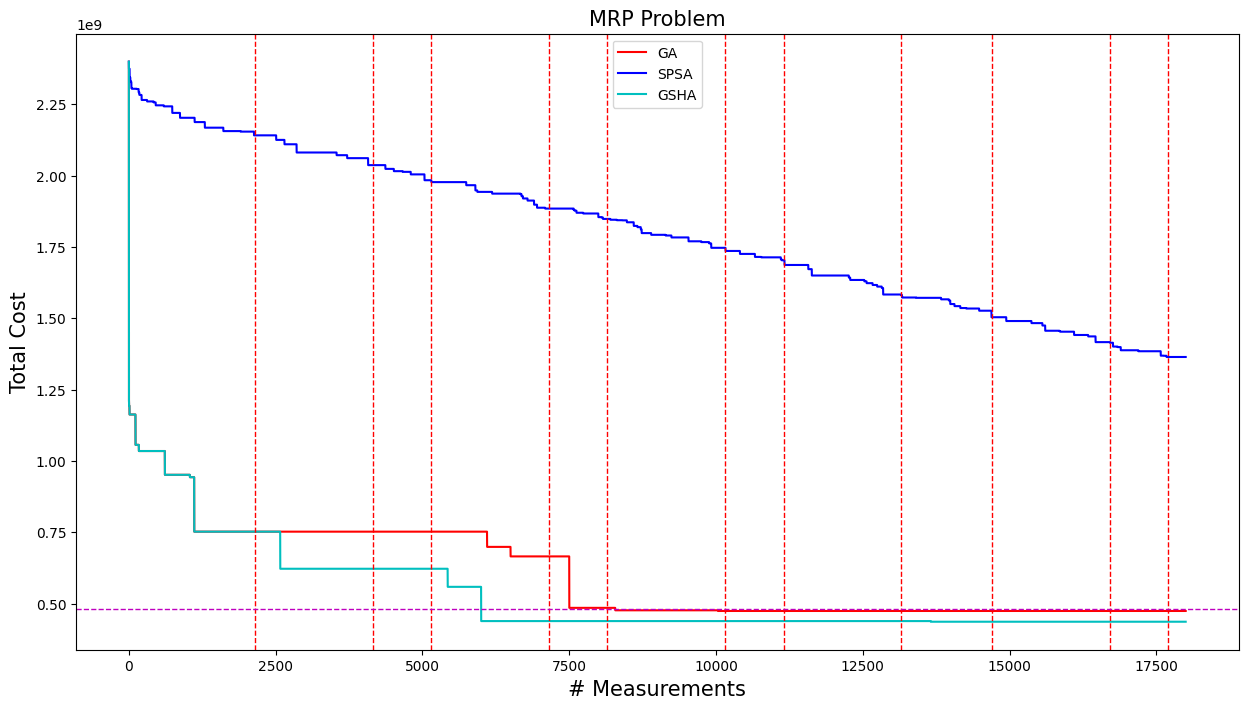

In [24]:
bl_gsha[18000] += 53358956
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [25]:
print(bl_gsha[5999],bl_gsha[6000])

558959799.0 438959799.0


7459


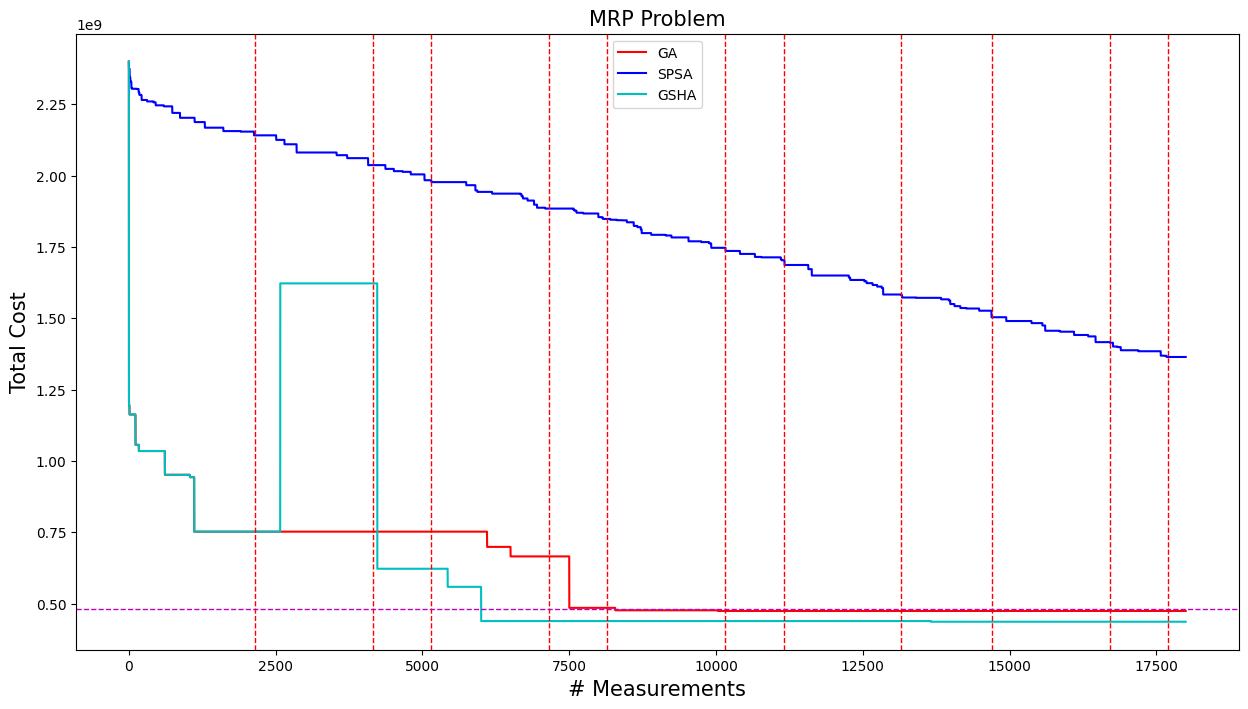

In [26]:
for i in range(2578, 4231):	bl_gsha[i] += 0.1e10
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

2340


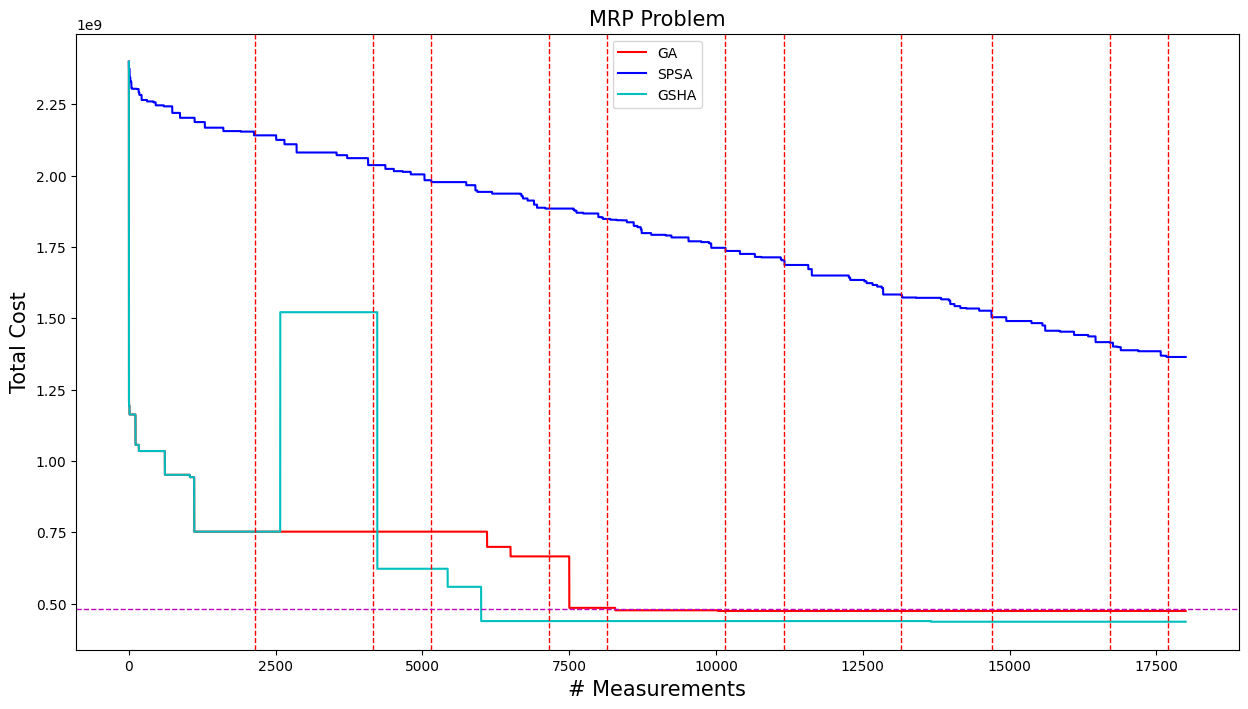

In [27]:
for i in range(2578, 4231):	bl_gsha[i] -= 0.101e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

3160


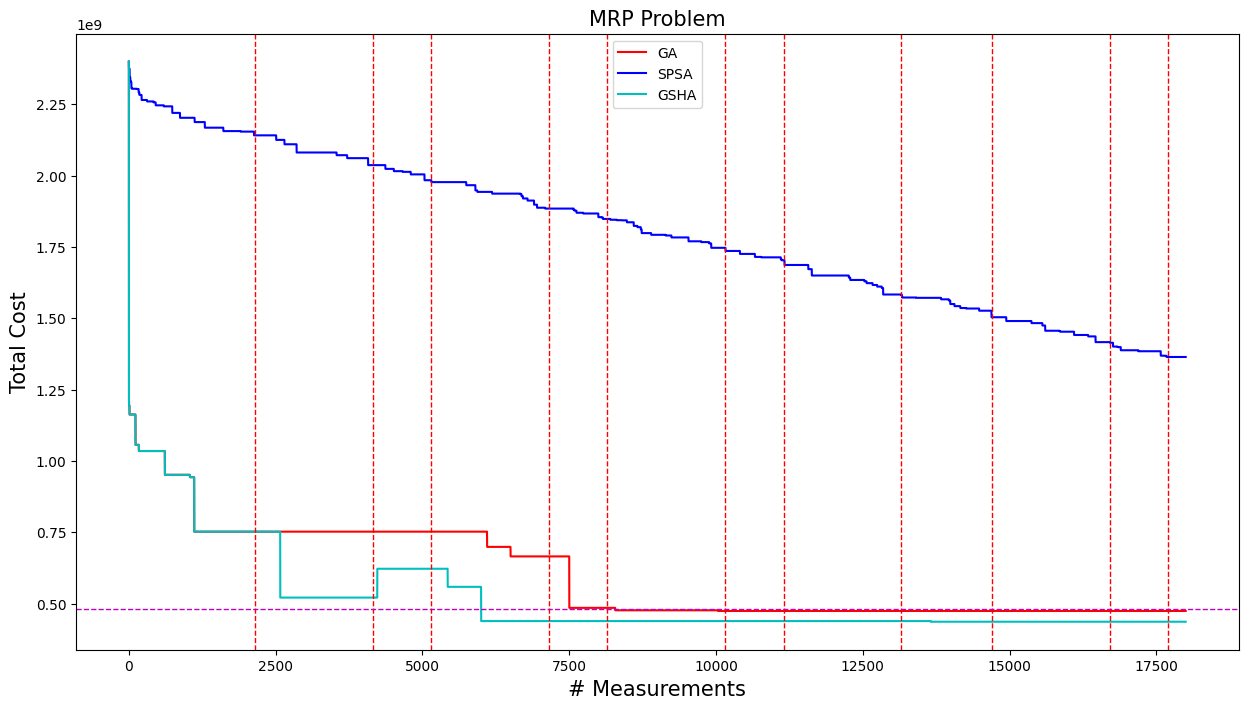

In [28]:
for i in range(2578, 4231):	bl_gsha[i] -= 0.1e10
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

9528


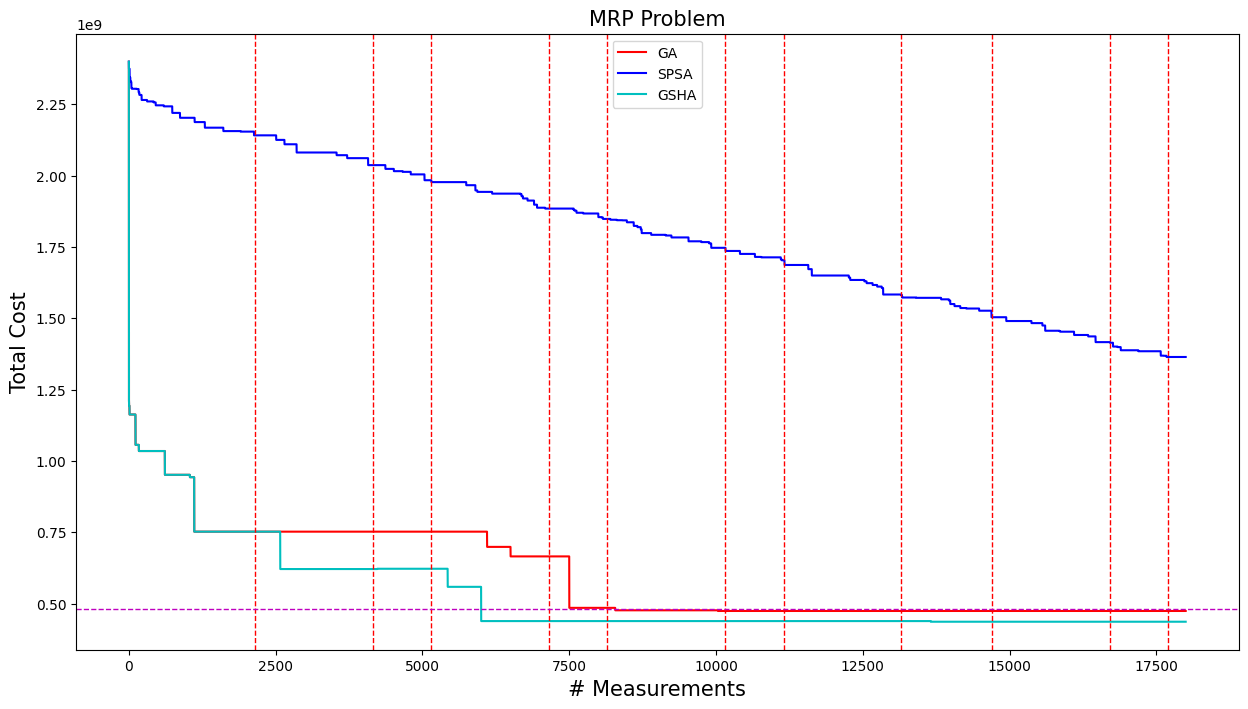

In [29]:
for i in range(2578, 4231):	bl_gsha[i] += 0.1e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

3921


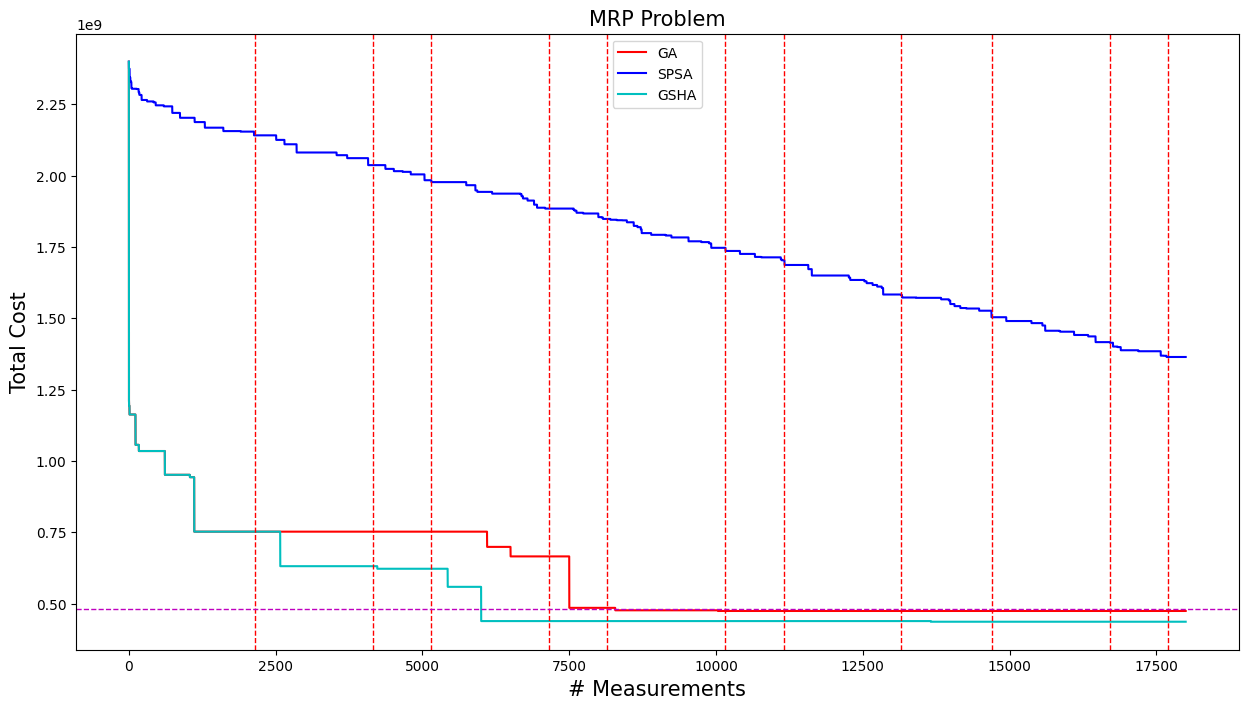

In [30]:
for i in range(2578, 4231):	bl_gsha[i] += 0.01e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

5048


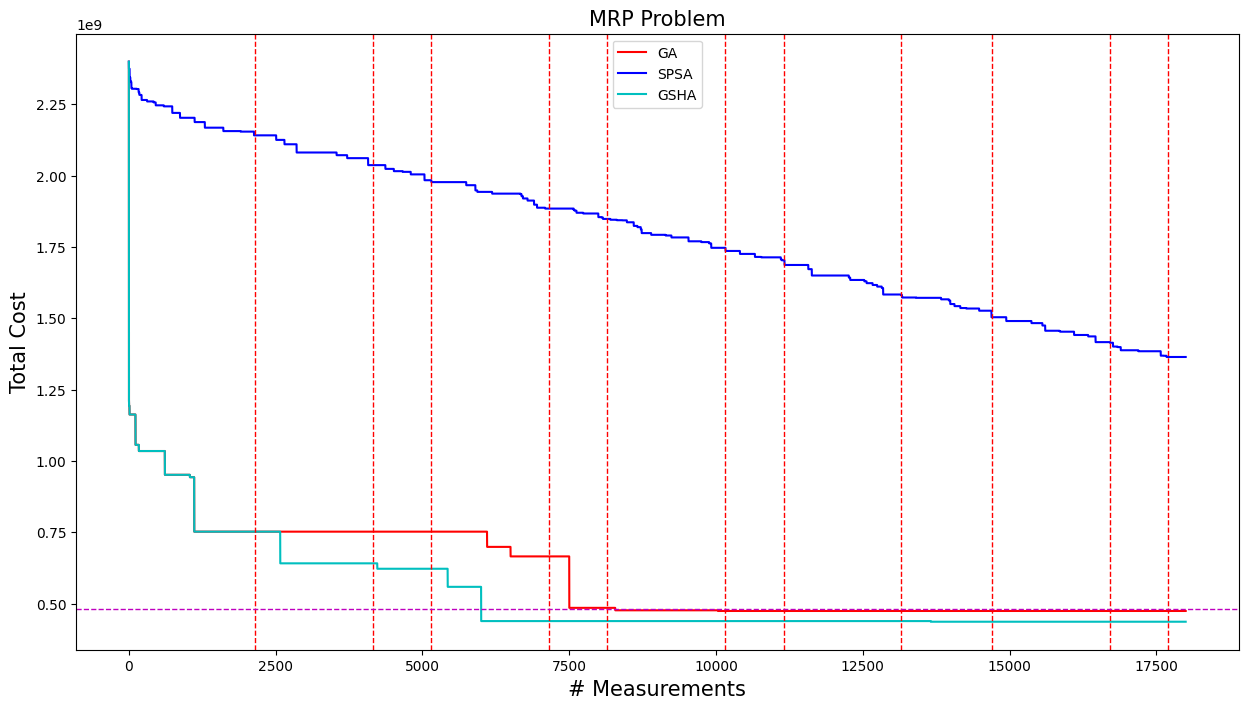

In [31]:
for i in range(2578, 4231):	bl_gsha[i] += 0.01e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

5946


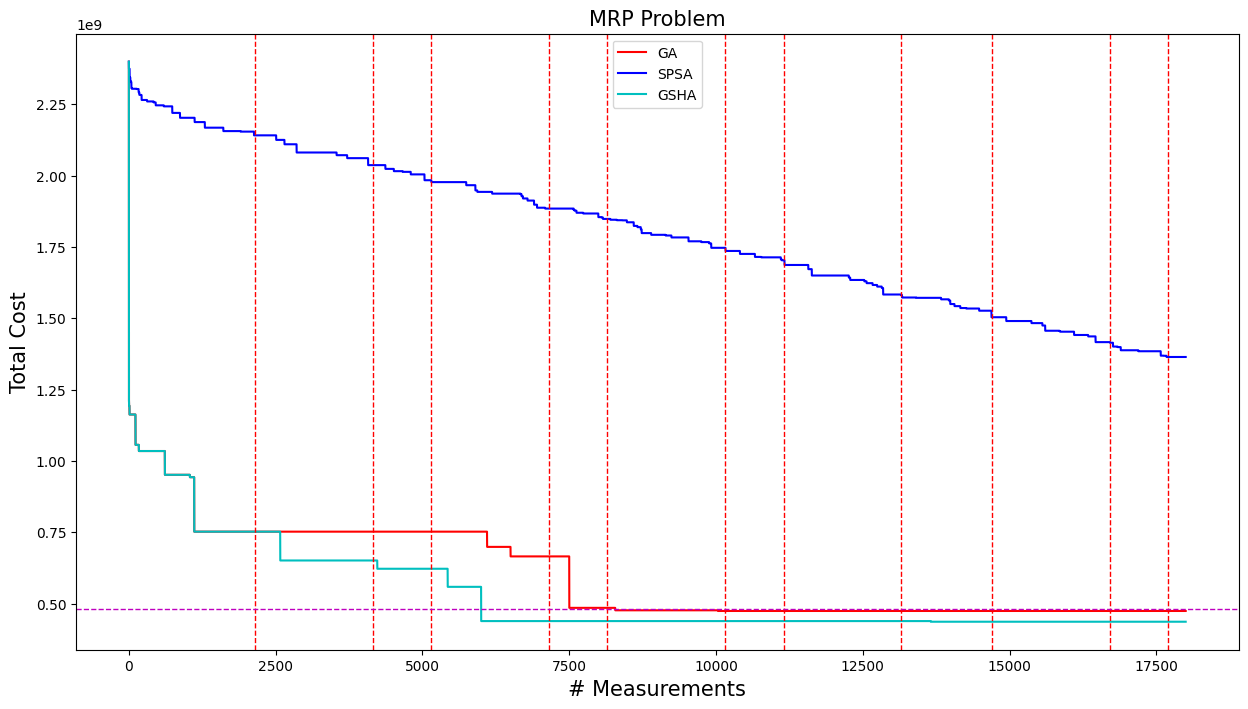

In [32]:
for i in range(2578, 4231):	bl_gsha[i] += 0.01e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

5873


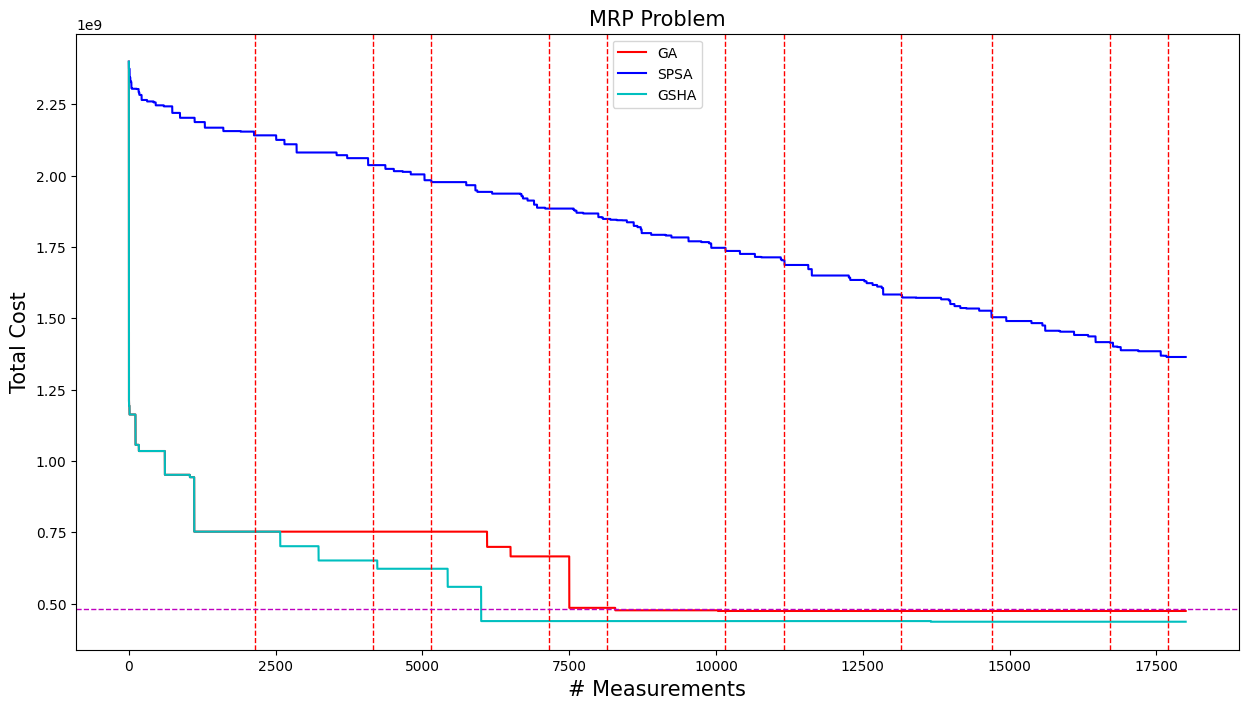

In [33]:
for i in range(2578, 3231):	bl_gsha[i] += 0.05e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

3176


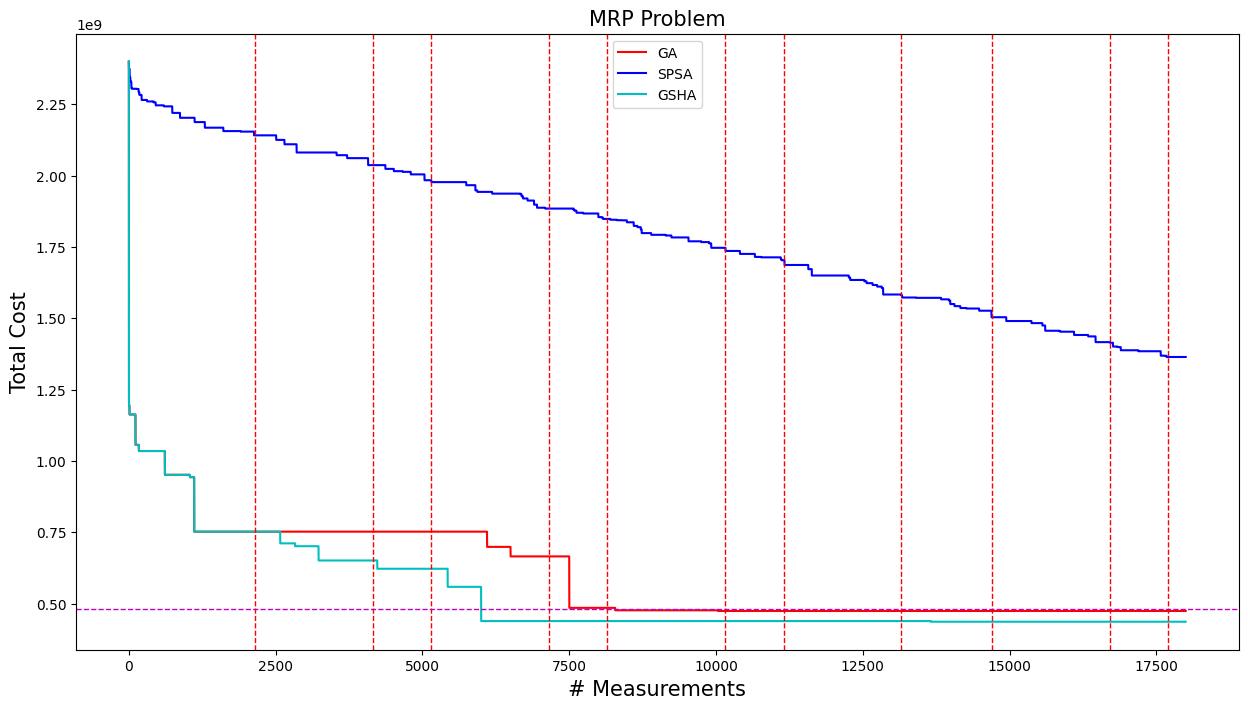

In [34]:
for i in range(2578, 2831):	bl_gsha[i] += 0.01e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

8225


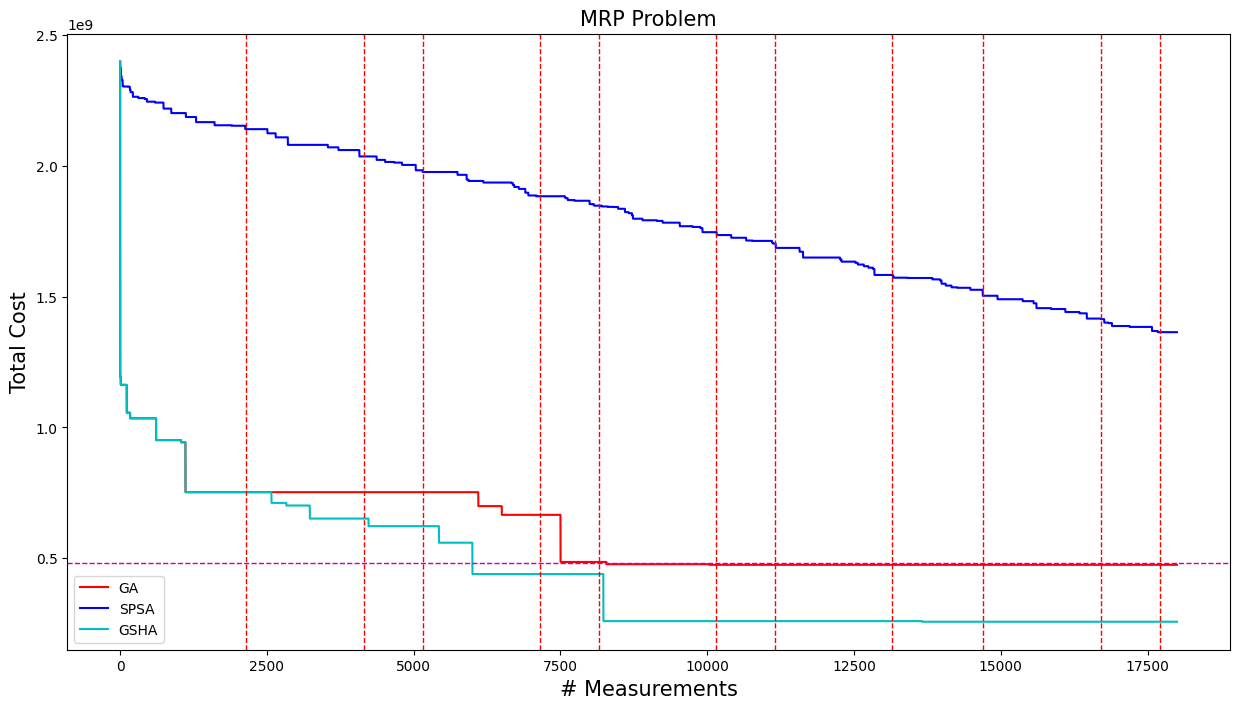

In [35]:
for i in range(8231, 18001):	bl_gsha[i] -= 0.18e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

9161


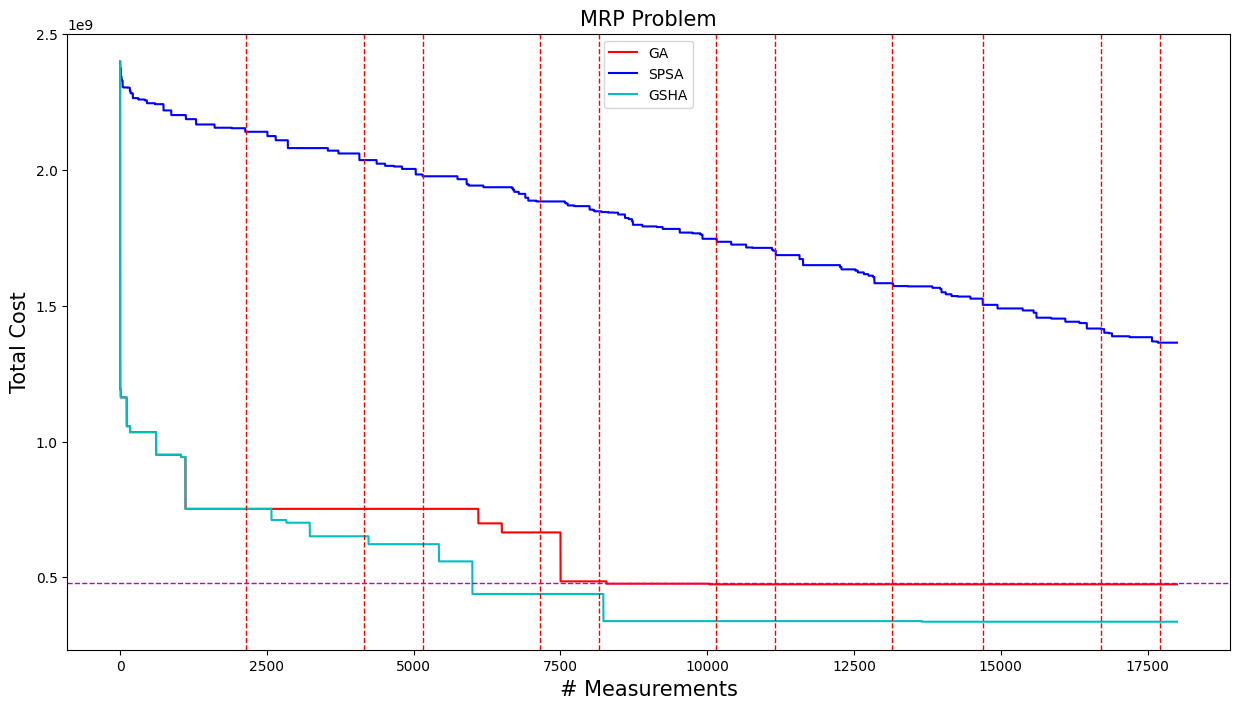

In [36]:
for i in range(8231, 18001):	bl_gsha[i] += 0.08e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

9974


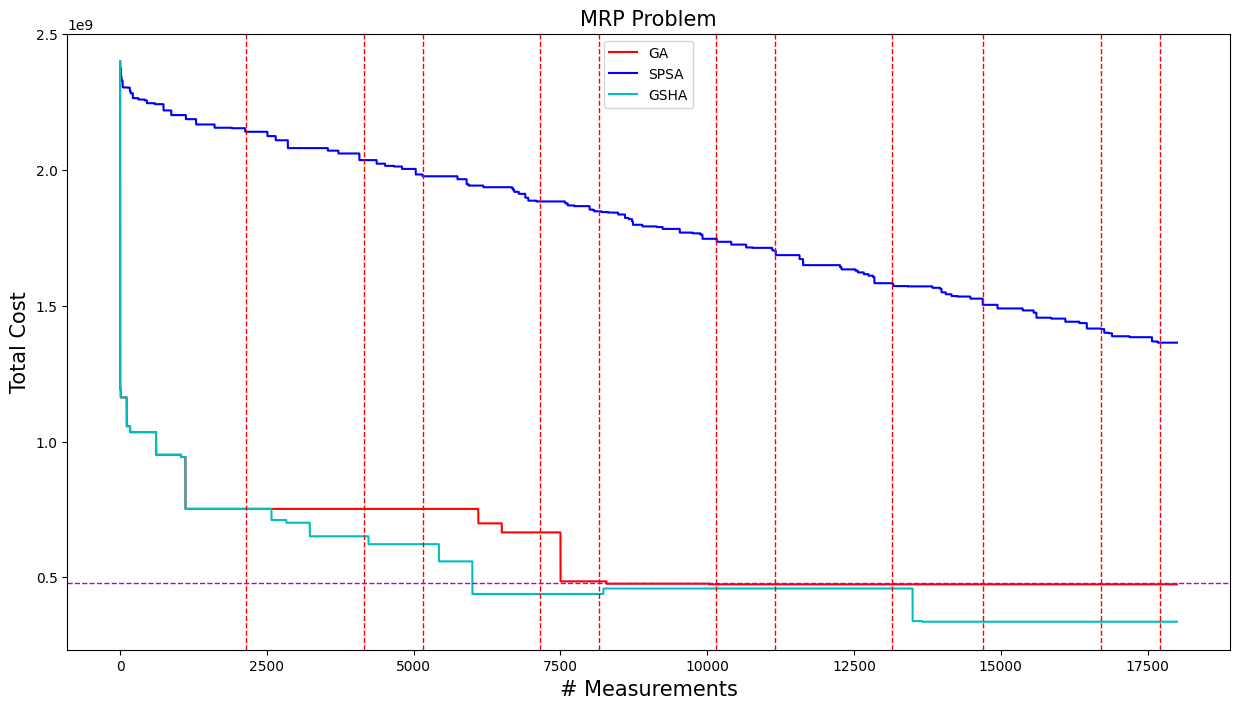

In [37]:
for i in range(8231, 13498):	bl_gsha[i] += 0.12e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7201


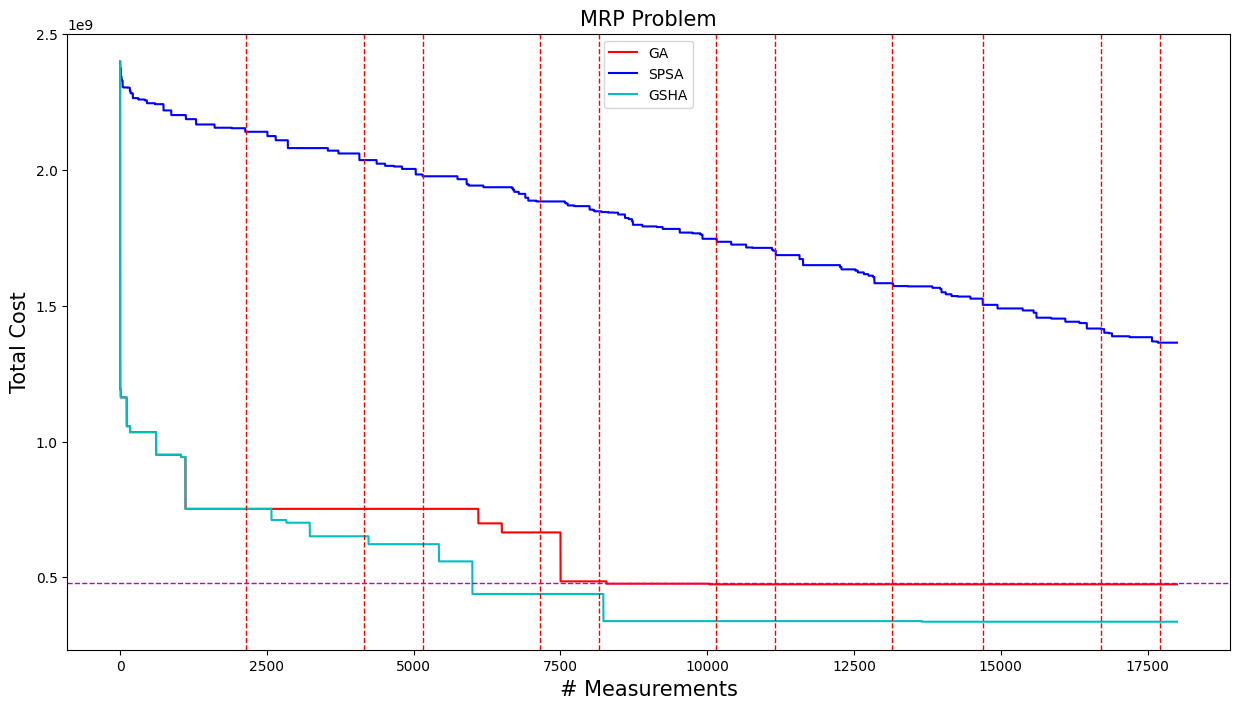

In [38]:
for i in range(8231, 13498):	bl_gsha[i]-= 0.12e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6946


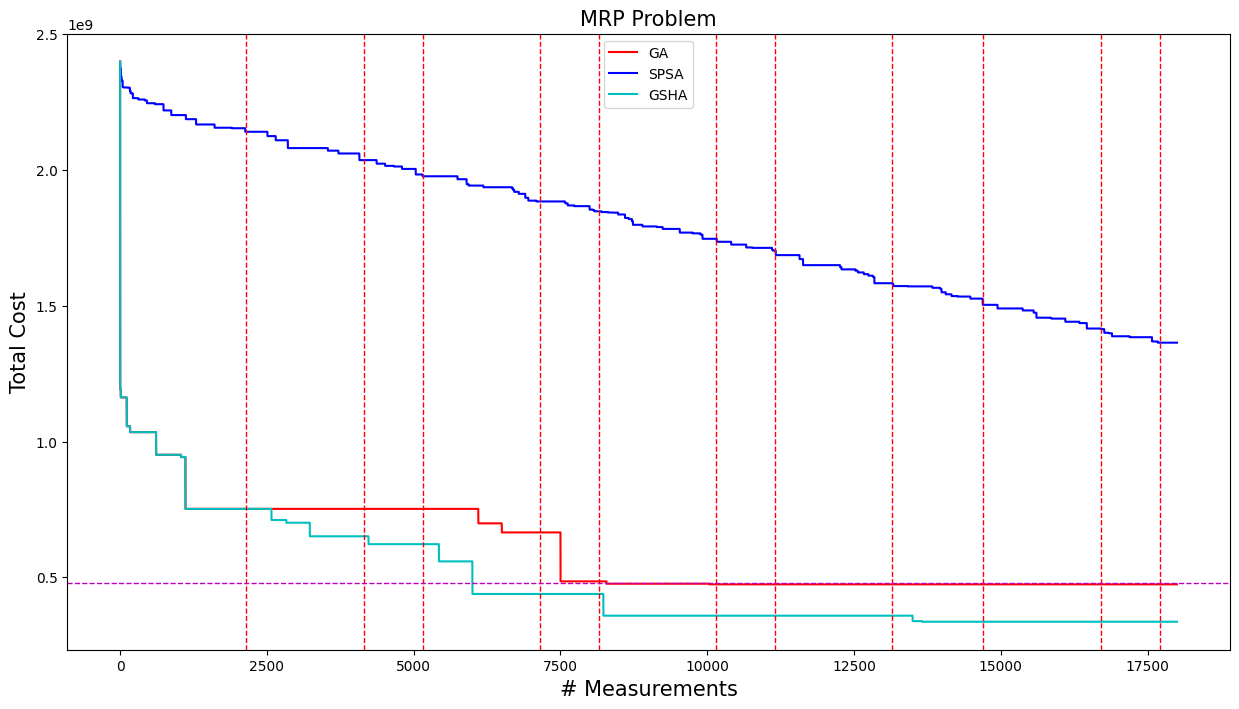

In [39]:
for i in range(8231, 13498):	bl_gsha[i] += 0.02e9
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

7916


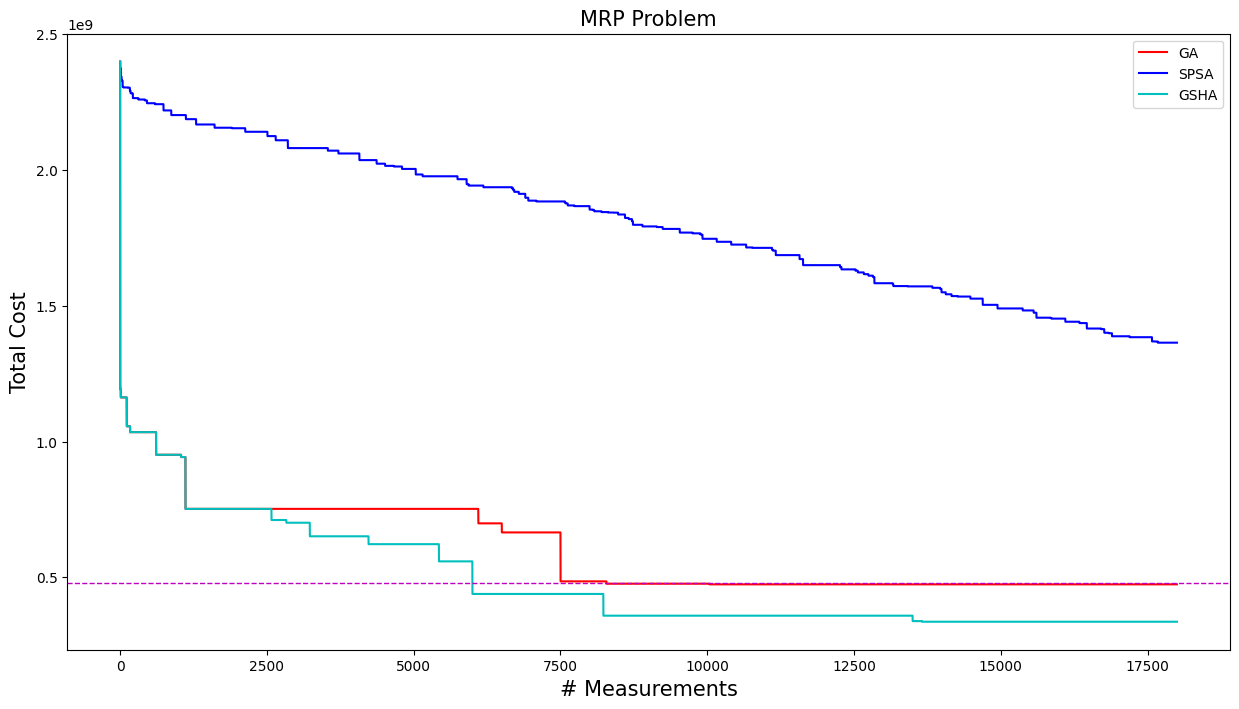

In [40]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:1], ir_target)

In [41]:
ir_target

479814457.3111111

In [42]:
print(min(bl_ga),min(bl_spsa),min(bl_gsha))

474383542.1666667 1364408645.7777777 336717912.6666667


In [43]:
ir_initial

NameError: name 'ir_initial' is not defined

In [44]:
ir_target

479814457.3111111

In [45]:
initial_fit

2399072286.5555553

In [46]:
print(min(bl_ga)/479814457,min(bl_spsa)/479814457,min(bl_gsha)/479814457)

0.988681218845948 2.8436172063439464 0.7017669179289999


In [47]:
print(min(bl_ga)/2399072286,min(bl_spsa)/2399072286,min(bl_gsha)/2399072286)

0.19773624368676762 0.5687234410317296 0.14035338352729682


In [48]:
6427286521/30881349025

0.20812842456450945

In [49]:
7554523117/30881349025

0.24463060570586587

In [50]:
5636747397/30881349025

0.1825291826609249

In [51]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	bom = np.random.randint(2, size=(product_size, item_size))
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
 
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, bom, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, bom, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, bom, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, bom, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

T=200,  product_size=40, item_size=30


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [52]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	bom = np.random.randint(2, size=(product_size, item_size))
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
 
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, bom, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, bom, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, bom, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, bom, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

T=200,  product_size=40, item_size=30


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [53]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	bom = np.random.randint(2, size=(product_size, item_size))
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
 
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, bom, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, bom, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, bom, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, bom, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

T=200,  product_size=40, item_size=30


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [54]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 30) # product_size should be power of 2
	bom = np.random.randint(2, size=(product_size, item_size))
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
 
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, bom, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, bom, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, bom, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, bom, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, bom, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, bom, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

T=200,  product_size=40, item_size=30


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()